## Exploratory Data Analysis of African Influencers
<!--  for Nike Inc Proposed Social Media Marketing Campaign-->
- #### Twitter users segmentation

#### Table of Content

<html>
    
<ul> 
<!--  <li> <a href="#abs">Abstract</a></li> -->
 <li> <a href= "#obj">Introduction</a> </li>
 <li> <a href ="#rq">Research Questions </a> </li>
 <li> <a href="#dw">Data Wrangling</a> </li>
 <li> <a href="#ana">Analysis</a></li>
    <ol>
        <li><a href = "#r1">Research Question 1</a></li>
        <li><a href = "#r2">Research Question 2</a></li>
        <li><a href = "#r3">Research Question 3</a></li>
    </ol>
 <li> <a href = "#gi">General Insights</a></li>   
 <li> <a href = "#rc">Recommendations & Conclusion</a></li>
 <li> <a href = "#lim">Limitations</a></li>
 <li> <a href= "#ref">References</a> </li>
</ul>
    <a id="top"></a>
</html>

<a id="obj"></a>
### Introduction

- Background

        Nike Inc is planning a new digital campaign in Africa, 

        and wants to understand who the social media influencers are in Africa.

        And in which area they fall into (e.g. politics,fashion, art, etc.).

        This is key to Nike as they don’t want to be associated with the 

        wrong influencers (ethnic and religious polarisation figures for example)




- Objective

        This analysis is aimed at identifying top twitter influcners 
            
        and most influnential govermtnt ofiifical accounts  on Twitter
            
        Top Influncers would be idetified based on three different metrics:
            1. Reach (FOllowers count)
            2. Popularity (Likes & Retweets)
            3. Relevance (Mentions counts &  Reply counts)
             
        The findings from this analysis would be used to 
        recommend certain line of actions to Nike Inc in its propsed expansion to Africa
            
        The data would be gathered using the Twittter API


<a id="rq"></a>
### Research Questions

#### The Reserach Question are formed in reference to the objective of this Analytic effort: 
####  `Nike Expanding to Africa` 

- Reserch Question 1:
        
    >  Who are the Top Influencers & what are thier  Attributes:
    
     > a. Who are the top 10 non-governmental Influencers ?
        
     > b. What african government have more influence (top 10) ? 
     
     > c. Among the top influencers, is there a corellation between:
     
  -         reach and relevance 
  -         reach and populairty
  -         popularity and relevance
     
    

- Research Question 2: 

 > Popular narratives among theses influencers (governmental & non-governmental) :
        
   >> What are the top 5 (most used) hahstags among the influencers
     
    
- Research Question 3:

    > Spatial & Temporal setting of influencers:
    
    > a. What profession/domain is most popular among the non-government influencers
    
    > b. What is the average age of these influencers account? 
    
    > c. Is there a corellation between account age and popularity score, reach score amd relevance score
    
 
 

<a id="dw"></a>
### Data Wrangling

> Import Libraries

In [1428]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, rankdata

from PIL import Image
import warnings

warnings.filterwarnings("ignore")
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

#### Gather Data
> Load Datasets

>> Tweet Info

>>> Africa Govt. Covid19 Response Tweet Info

In [1429]:
govtRes = pd.read_csv('twitter_datasets/acct_info/afriqGovCovid19Resp.csv')

>>> Africa Influencers Tweet Info

In [1430]:
afriqInf = pd.read_csv('twitter_datasets/acct_info/afriqTopInfluencers.csv')

>> Hashtags Info

>>> Africa Govt. Covid19 Response Hashtags

In [1431]:
govtResHash = pd.read_csv('twitter_datasets/acct_hashtags/govtHashtags.csv')

>>> Africa Influencers Hashtags

In [1432]:
afriqInfHash = pd.read_csv('twitter_datasets/acct_hashtags/afriqInfHashtags.csv')

In [1433]:
afriqInfHash2 = pd.read_csv('twitter_datasets/acct_hashtags/afriqInfHashtags2.csv')

In [1434]:
afriqInfHash3 = pd.read_csv('twitter_datasets/acct_hashtags/afriqInfHashtags3.csv')

#### Assessment & Cleaning

> Assess data for quality and structural issues

>> Tweet Info datasets

In [1435]:
govtResCopy = govtRes.copy()

In [1436]:
govtResCopy.head()

,Unnamed: 0,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count
0,0,1181832897508065280,Eswatini Government,EswatiniGovern1,This is the official twitter account of the Go...,1672,82,11284,282,5,78,13,5600,1655
1,0,2189970192,Malawi Government,MalawiGovt,#Malawi Government Twitter Feed | https://t.co...,4030,26,39182,2439,1,85,49,8404,4503
2,0,2515899612,Hage G. Geingob,hagegeingob,President of the Republic of Namibia,1085,55,192187,2247,0,3,1,13081,1641
3,0,1239872615248015361,Seychelles Ministry of Finance,FinanceSC,"Ministry of Finance, Trade, Investment and Eco...",124,224,126,122,1,0,0,10,1
4,0,40839292,Presidency | South Africa 🇿🇦,PresidencyZA,This is the official Twitter page of The Presi...,18848,14,1597660,4078,4,73,123,25153,11990


In [1437]:
govtResCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        42 non-null     int64 
 1   id                42 non-null     int64 
 2   name              42 non-null     object
 3   screen_name       42 non-null     object
 4   description       40 non-null     object
 5   statuses_count    42 non-null     int64 
 6   friends_count     42 non-null     int64 
 7   followers_count   42 non-null     int64 
 8   account_age_days  42 non-null     int64 
 9   avg_daily_tweets  42 non-null     int64 
 10  hashtags          42 non-null     int64 
 11  user_mentions     42 non-null     int64 
 12  favorite_count    42 non-null     int64 
 13  retweet_count     42 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 4.7+ KB


>> Drop column `unnamed`

In [1438]:
govtResCopy.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [1439]:
govtResCopy.head()

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count
0,1181832897508065280,Eswatini Government,EswatiniGovern1,This is the official twitter account of the Go...,1672,82,11284,282,5,78,13,5600,1655
1,2189970192,Malawi Government,MalawiGovt,#Malawi Government Twitter Feed | https://t.co...,4030,26,39182,2439,1,85,49,8404,4503
2,2515899612,Hage G. Geingob,hagegeingob,President of the Republic of Namibia,1085,55,192187,2247,0,3,1,13081,1641
3,1239872615248015361,Seychelles Ministry of Finance,FinanceSC,"Ministry of Finance, Trade, Investment and Eco...",124,224,126,122,1,0,0,10,1
4,40839292,Presidency | South Africa 🇿🇦,PresidencyZA,This is the official Twitter page of The Presi...,18848,14,1597660,4078,4,73,123,25153,11990


> Check for duplicates

In [1440]:
govtResCopy.duplicated().any()

False

> There are no duplicate rows

> THe data is clean and fit for analysis

In [1441]:
afriqInfCopy = afriqInf.copy()

In [1442]:
afriqInfCopy.head()

,Unnamed: 0,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count
0,0,305125998,Jeffrey Gettleman,gettleman,South Asia bureau chief for the New York Times...,3770,37,25700,3340,1,5,38,268,111152
1,0,26475943,A24 Media,a24media,Africa 24 produces compelling content that mak...,16869,3059,31285,4132,4,32,52,96,190
2,0,72013267,Scapegoat,AndiMakinana,In pursuit of scoops. I do not write headlines...,142223,2839,101246,3967,35,39,626,19466,398095
3,0,625489039,Africa Check,AfricaCheck,Africa's first independent fact-checking websi...,27317,4590,68061,2936,9,156,205,1353,1398
4,0,401520924,James Copnall,JamesCopnall,BBC reporter + presenter. Author A Poisonous T...,19434,5046,21958,3182,6,19,82,139,47608


In [1443]:
afriqInfCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        93 non-null     int64 
 1   id                93 non-null     int64 
 2   name              93 non-null     object
 3   screen_name       93 non-null     object
 4   description       89 non-null     object
 5   statuses_count    93 non-null     int64 
 6   friends_count     93 non-null     int64 
 7   followers_count   93 non-null     int64 
 8   account_age_days  93 non-null     int64 
 9   avg_daily_tweets  93 non-null     int64 
 10  hashtags          93 non-null     int64 
 11  user_mentions     93 non-null     int64 
 12  favorite_count    93 non-null     int64 
 13  retweet_count     93 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 10.3+ KB


> drop column `Unnamed: 0`

In [1444]:
afriqInfCopy.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [1445]:
afriqInfCopy.head()

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count
0,305125998,Jeffrey Gettleman,gettleman,South Asia bureau chief for the New York Times...,3770,37,25700,3340,1,5,38,268,111152
1,26475943,A24 Media,a24media,Africa 24 produces compelling content that mak...,16869,3059,31285,4132,4,32,52,96,190
2,72013267,Scapegoat,AndiMakinana,In pursuit of scoops. I do not write headlines...,142223,2839,101246,3967,35,39,626,19466,398095
3,625489039,Africa Check,AfricaCheck,Africa's first independent fact-checking websi...,27317,4590,68061,2936,9,156,205,1353,1398
4,401520924,James Copnall,JamesCopnall,BBC reporter + presenter. Author A Poisonous T...,19434,5046,21958,3182,6,19,82,139,47608


In [1446]:
afriqInfCopy.duplicated().any()

False

> There are no duplicates

> The data is clean and fir for analysis

#### Load Hahstag Info Datasets

1. 

In [1447]:
govtResHashCopy = govtResHash.copy()

In [1448]:
govtResHashCopy.head()

,Unnamed: 0,hashtags,id,name,screen_name,hashtags_count
0,0,52YearsOfFriendship,1181832897508065280,Eswatini Government,EswatiniGovern1,3
1,1,AdventureTime,1181832897508065280,Eswatini Government,EswatiniGovern1,1
2,2,AfricaDay,1181832897508065280,Eswatini Government,EswatiniGovern1,1
3,3,AllHandsOnDeck,1181832897508065280,Eswatini Government,EswatiniGovern1,1
4,4,BottomLineSABC,1181832897508065280,Eswatini Government,EswatiniGovern1,1


In [1449]:
govtResHashCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8092 entries, 0 to 8091
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      8092 non-null   int64 
 1   hashtags        8092 non-null   object
 2   id              8092 non-null   int64 
 3   name            8092 non-null   object
 4   screen_name     8092 non-null   object
 5   hashtags_count  8092 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 379.4+ KB


> Drop `Unnamed: 0` column

In [1450]:
govtResHashCopy.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [1451]:
govtResHashCopy

,hashtags,id,name,screen_name,hashtags_count
0,52YearsOfFriendship,1181832897508065280,Eswatini Government,EswatiniGovern1,3
1,AdventureTime,1181832897508065280,Eswatini Government,EswatiniGovern1,1
2,AfricaDay,1181832897508065280,Eswatini Government,EswatiniGovern1,1
3,AllHandsOnDeck,1181832897508065280,Eswatini Government,EswatiniGovern1,1
4,BottomLineSABC,1181832897508065280,Eswatini Government,EswatiniGovern1,1
...,...,...,...,...,...
8087,nomination,1095703543045083136,Ministère de la Communication & Médias - CG🇨🇬,MinistereComCG,1
8088,parlement,1095703543045083136,Ministère de la Communication & Médias - CG🇨🇬,MinistereComCG,1
8089,sacrifice,1095703543045083136,Ministère de la Communication & Médias - CG🇨🇬,MinistereComCG,1
8090,vœux,1095703543045083136,Ministère de la Communication & Médias - CG🇨🇬,MinistereComCG,1


In [1452]:
govtResHashCopy.duplicated().any()

False

> There are no duplicates

2, 

<!-- > To make the tables more normalised, we need to join the info tables to thier respective hashtag tables -->

> We have to append( the dataset into one

In [1453]:
afriqInfHash.head(1)

,Unnamed: 0,hashtags,id,name,screen_name,hashtags_count
0,0,2015NepalBlockade,305125998,Jeffrey Gettleman,gettleman,1


In [1454]:
afriqInfHash2.head(1)

,Unnamed: 0,hashtags,id,name,screen_name,hashtags_count
0,0,2016RFF,140003488,IFC Africa,IFCAfrica,1


In [1455]:
afriqInfHash3.head(1)

,Unnamed: 0,hashtags,id,name,screen_name,hashtags_count
0,0,10sseries,25082212,Bob Skinstad,BobSkinstad,2


In [1456]:
afriqInfHashMerged = afriqInfHash.append(afriqInfHash2).append(afriqInfHash3)

In [1457]:
afriqInfHashCopy = afriqInfHashMerged.copy()

In [1458]:
afriqInfHashCopy.head(3)

,Unnamed: 0,hashtags,id,name,screen_name,hashtags_count
0,0,2015NepalBlockade,305125998,Jeffrey Gettleman,gettleman,1
1,1,6PM,305125998,Jeffrey Gettleman,gettleman,1
2,2,ARYNews,305125998,Jeffrey Gettleman,gettleman,1


> Drop `Unnamed: 0` column

In [1459]:
afriqInfHashCopy.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [1460]:
afriqInfHashCopy.head()

,hashtags,id,name,screen_name,hashtags_count
0,2015NepalBlockade,305125998,Jeffrey Gettleman,gettleman,1
1,6PM,305125998,Jeffrey Gettleman,gettleman,1
2,ARYNews,305125998,Jeffrey Gettleman,gettleman,1
3,Abhinandan,305125998,Jeffrey Gettleman,gettleman,1
4,Adani,305125998,Jeffrey Gettleman,gettleman,1


In [1461]:
afriqInfHashCopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39770 entries, 0 to 5071
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   hashtags        39768 non-null  object
 1   id              39770 non-null  int64 
 2   name            39770 non-null  object
 3   screen_name     39770 non-null  object
 4   hashtags_count  39770 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.8+ MB


> drop column `Unnamed: 0`

In [1462]:
afriqInfHashCopy.duplicated().any()

True

> Drop Duplicate COliumns

In [1463]:
afriqInfHashCopy.drop_duplicates(inplace=True)

In [1464]:
afriqInfHashCopy.duplicated().any()

False

> Drop empty hshatags

In [1465]:
afriqInfHashCopy.isna().any()

hashtags           True
id                False
name              False
screen_name       False
hashtags_count    False
dtype: bool

In [1466]:
afriqInfHashCopy.dropna(inplace=True)

In [1467]:
afriqInfHashCopy.isna().any()

hashtags          False
id                False
name              False
screen_name       False
hashtags_count    False
dtype: bool

In [1468]:
afriqInfHashCopy.isnull().any()

hashtags          False
id                False
name              False
screen_name       False
hashtags_count    False
dtype: bool

> Assess the hahstgag table for influencers

In [1469]:
afriqInfHashCopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38933 entries, 0 to 5071
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   hashtags        38933 non-null  object
 1   id              38933 non-null  int64 
 2   name            38933 non-null  object
 3   screen_name     38933 non-null  object
 4   hashtags_count  38933 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.8+ MB


In [1470]:
display(afriqInfHashCopy)

,hashtags,id,name,screen_name,hashtags_count
0,2015NepalBlockade,305125998,Jeffrey Gettleman,gettleman,1
1,6PM,305125998,Jeffrey Gettleman,gettleman,1
2,ARYNews,305125998,Jeffrey Gettleman,gettleman,1
3,Abhinandan,305125998,Jeffrey Gettleman,gettleman,1
4,Adani,305125998,Jeffrey Gettleman,gettleman,1
...,...,...,...,...,...
5067,vt,46335511,Trevor Noah,Trevornoah,1
5068,weakdonald,46335511,Trevor Noah,Trevornoah,1
5069,winning,46335511,Trevor Noah,Trevornoah,1
5070,worstresponders,46335511,Trevor Noah,Trevornoah,2


<a id="ana"></a>

### Analysis

<a id="r1"></a>

#### Research Question 1: 



> Who are the Top Influencers & what are thier  Attributes:

>   a. Who are the top 10 non-governmental Influencers ?

>    b. What african government have more influence (top 10) ?

>    c. Among the top influencers, is there a corellation between:

 -        reach and relevance 
 -        reach and populairty
 -        popularity and relevance
     

- In determing influence across board, these metrics have to be calcuated:

1. Popularity = likes + retweets

2. Reach = followers - foollowing

3. Relevance = number of mentions

`NB:` We would give more emphasis to Popularity and Relevance metric to avoid the million follower fallacy
    
<a href="http://twitter.mpi-sws.org/icwsm2010_fallacy.pdf">million follower fallacy<a/>

> First we need to drop inactive accounts, with tweets less than 5

>> tweet count in our dataset is statuses_count

> Govt Accunt data

In [1471]:
govtResCopy.query('statuses_count < 5')

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count


> The datasets for African government has no inactive users

> Influencers Account data

In [1472]:
afriqInfCopy.query('statuses_count < 5')

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count
7,874203101108023296,SEO Expert Vancouver,stateafrica,NaN,1,0,8,1131,0,0,0,1,0
26,1124706854628671490,T.I.A,ThisisAfrica,T.I.A,0,0,6,439,0,0,0,0,0
72,3997935917,SmithInAfrica,SmithInAfrica,NaN,1,0,69,1732,0,0,2,0,1


> In our influencers dataset, we have some accounts with tweets less than 5.
> Hence they would be dropped

In [1473]:
inactiveInf = afriqInfCopy.query('statuses_count < 5')

In [1474]:
afriqInfCopy.drop(inactiveInf.index, axis=0, inplace=True)

> Let's confirm they were  dropped

In [1475]:
afriqInfCopy.query('statuses_count < 5')

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count


> THey were dropped

> We also have to drop these users in our influencers hashtag table

In [1476]:
users_to_drop = inactiveInf.name.to_list()
users_to_drop

['SEO Expert Vancouver', 'T.I.A', 'SmithInAfrica']

In [1477]:
afriqInfHashCopy[afriqInfHashCopy.name.str.contains('SEO Expert Vancouver | T.I.A | SmithInAfrica')]

,hashtags,id,name,screen_name,hashtags_count


In [1478]:
users_to_drop=afriqInfHashCopy[afriqInfHashCopy.name.str.contains('SEO Expert Vancouver | T.I.A | SmithInAfrica')].index

In [1479]:
afriqInfHashCopy.drop(users_to_drop, axis=0, inplace=True)

In [1480]:
afriqInfHashCopy

,hashtags,id,name,screen_name,hashtags_count
0,2015NepalBlockade,305125998,Jeffrey Gettleman,gettleman,1
1,6PM,305125998,Jeffrey Gettleman,gettleman,1
2,ARYNews,305125998,Jeffrey Gettleman,gettleman,1
3,Abhinandan,305125998,Jeffrey Gettleman,gettleman,1
4,Adani,305125998,Jeffrey Gettleman,gettleman,1
...,...,...,...,...,...
5067,vt,46335511,Trevor Noah,Trevornoah,1
5068,weakdonald,46335511,Trevor Noah,Trevornoah,1
5069,winning,46335511,Trevor Noah,Trevornoah,1
5070,worstresponders,46335511,Trevor Noah,Trevornoah,2


#### Measuring Influence across african government handles

In [1481]:
govtResCopy.head(2)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count
0,1181832897508065280,Eswatini Government,EswatiniGovern1,This is the official twitter account of the Go...,1672,82,11284,282,5,78,13,5600,1655
1,2189970192,Malawi Government,MalawiGovt,#Malawi Government Twitter Feed | https://t.co...,4030,26,39182,2439,1,85,49,8404,4503


#### Popularity Score

> To get populairty score, we have to do #retweets + #likes(favorites)

In [1482]:
govtResCopy['popularity'] = govtResCopy.favorite_count + govtResCopy.retweet_count 

#### Reach Score

> To get reach score, we have to do #followers - #following

In [1483]:
govtResCopy['reach'] = govtResCopy.followers_count - govtResCopy.friends_count

#### Relevance Score 

> To get relevance score, we have to do #comments (reply counts) + #mentions

- `NB:` getting reply counts is limited to premium accounts. 

- Hence we would be using retweet_count `as proxy`. It suits best for the purpose

In [1484]:
govtResCopy['relevance'] = govtResCopy.user_mentions + govtResCopy.retweet_count

> View the dataset

In [1485]:
govtResCopy.head(2)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count,popularity,reach,relevance
0,1181832897508065280,Eswatini Government,EswatiniGovern1,This is the official twitter account of the Go...,1672,82,11284,282,5,78,13,5600,1655,7255,11202,1668
1,2189970192,Malawi Government,MalawiGovt,#Malawi Government Twitter Feed | https://t.co...,4030,26,39182,2439,1,85,49,8404,4503,12907,39156,4552


#### Measuring Influence across african influencers handles

In [1486]:
afriqInfCopy.head(2)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count
0,305125998,Jeffrey Gettleman,gettleman,South Asia bureau chief for the New York Times...,3770,37,25700,3340,1,5,38,268,111152
1,26475943,A24 Media,a24media,Africa 24 produces compelling content that mak...,16869,3059,31285,4132,4,32,52,96,190


#### Popularity Score 

In [1487]:
afriqInfCopy['popularity'] = afriqInfCopy.favorite_count + afriqInfCopy.retweet_count

#### Reach Score 

In [1488]:
afriqInfCopy['reach'] = afriqInfCopy.followers_count - afriqInfCopy.friends_count

#### Relevance Score

- `NB:` getting reply counts is limited to premium accounts. 

- Hence we would be using retweet_count `as proxy`. It suits best for the purpose

In [1489]:
afriqInfCopy['relevance'] = afriqInfCopy.user_mentions + afriqInfCopy.retweet_count

> View the dataset

In [1490]:
afriqInfCopy.head(2)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count,popularity,reach,relevance
0,305125998,Jeffrey Gettleman,gettleman,South Asia bureau chief for the New York Times...,3770,37,25700,3340,1,5,38,268,111152,111420,25663,111190
1,26475943,A24 Media,a24media,Africa 24 produces compelling content that mak...,16869,3059,31285,4132,4,32,52,96,190,286,28226,242


#### Find Correlation between theses measures of influence among African government

##### To perform statistical inferences like correlation, we need a gaussian data,
##### however, we can do the ffg in case of a non-gaussain data

> Sort govtResponse by:

>> Influential govt by popularity

>> Influential govt by reach

>> Influential govt by relevance

> Rank users : 
>> so that the rank of 1 indicates  the  most  influential  user  and  increasing  rank  indicates a less influential user.
>> Users with the same influence value receive the average of the rank amongst the

- Sort Values by each measure of Influence

In [1491]:
govtPop = govtResCopy.sort_values(by='popularity', axis=0, ascending=False)

In [1492]:
govtReach = govtResCopy.sort_values(by='reach', axis=0, ascending=False)

In [1493]:
govtRelevance = govtResCopy.sort_values(by='relevance', axis=0, ascending=False)

- Rank users

>> Before ranking, let's plot the distribution of each sorted data to observe whther there is a normal distribution (gaussian) or not

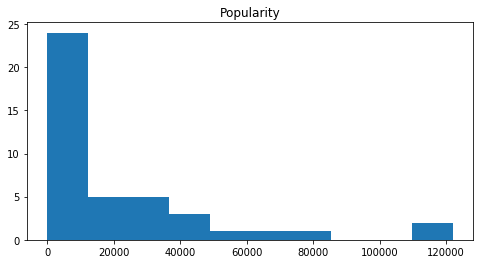

In [1494]:
plt.subplots(figsize=(8, 4))
plt.hist(govtPop.popularity);
plt.title('Popularity');

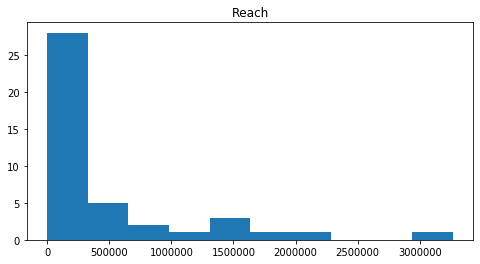

In [1495]:
plt.subplots(figsize=(8, 4))
plt.hist(govtReach.reach);
plt.title('Reach');

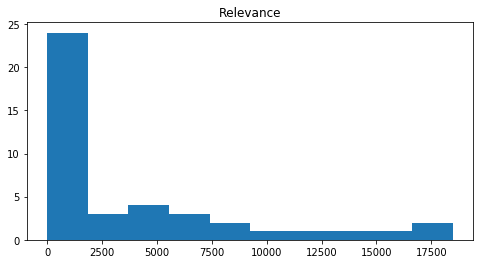

In [1496]:
plt.subplots(figsize=(8, 4))
plt.hist(govtRelevance.relevance);
plt.title('Relevance');

>> From the above, there is no normal distribution.. 

>> hence we cannot just find the if there is a correlation among them (_pearon correlation works for normally ditributed data_), 

> To calcualte the correlation between these (sorted) data points:, 
- we have to make them ordinal by assigning rank to them 
- then use spearman correlation  to find the correlation coefficient between them 

In [1497]:
govtPop.head(2)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count,popularity,reach,relevance
26,247217109,Nana Akufo-Addo,NAkufoAddo,Official Twitter account of Nana Addo Dankwa A...,7090,352,1505330,3451,2,24,21,106152,15905,122057,1504978,15926
13,1164801318742982656,Abdalla Hamdok,SudanPMHamdok,The official account of the Prime Minister of ...,652,115,369867,329,1,1,7,102936,17078,120014,369752,17085


In [1498]:
govtPop['ranking'] = [i+1 for i in range(len(govtPop.index))]
govtPop.head(1)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count,popularity,reach,relevance,ranking
26,247217109,Nana Akufo-Addo,NAkufoAddo,Official Twitter account of Nana Addo Dankwa A...,7090,352,1505330,3451,2,24,21,106152,15905,122057,1504978,15926,1


In [1499]:
govtReach['ranking'] = [i+1 for i in range(len(govtReach.index))]

In [1500]:
govtReach.head(2)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count,popularity,reach,relevance,ranking
32,2936714848,Muhammadu Buhari,MBuhari,This is the official account of Muhammadu Buha...,4734,26,3268955,2034,2,1,0,69304,14460,83764,3268929,14460,1
10,37601149,Paul Kagame,PaulKagame,"President of the Republic of Rwanda, write to:...",2861,181,1981754,4092,0,0,2,22794,5116,27910,1981573,5118,2


In [1501]:
govtRelevance['ranking'] = [i+1 for i in range(len(govtRelevance.index))]

In [1502]:
govtRelevance.head(2)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count,popularity,reach,relevance,ranking
17,337183326,Amb. Willy Nyamitwe,willynyamitwe,Ambassador & Senior Advisor to HE @GeneralNeva...,40665,4654,107296,3287,12,135,354,6461,18140,24601,102642,18494,1
13,1164801318742982656,Abdalla Hamdok,SudanPMHamdok,The official account of the Prime Minister of ...,652,115,369867,329,1,1,7,102936,17078,120014,369752,17085,2


> Let's fimd the correlation coeeficient betweent these measure

>> Emphasis would be placed on the correlation between `popularity` & `relevance`

>> This is because reach which is measured by followership does not necessariy indicate influence

>> This would help us avoid the `million folower fallacy` discussed in the reserach paper link above

- correlation between reach and relevance

In [1503]:
reach_rev_corr = pd.DataFrame(govtReach.reach.values.tolist(), govtRelevance.relevance.values.tolist()).reset_index()

In [1504]:
reach_rev_corr=reach_rev_corr.rename(columns={'index':'reach', 0: 'relevance'})

In [1505]:
reach_rev_corr.corr(method='spearman') 

,reach,relevance
reach,1.0,1.0
relevance,1.0,1.0


In [1506]:
spearmanr(reach_rev_corr)

SpearmanrResult(correlation=1.0, pvalue=0.0)

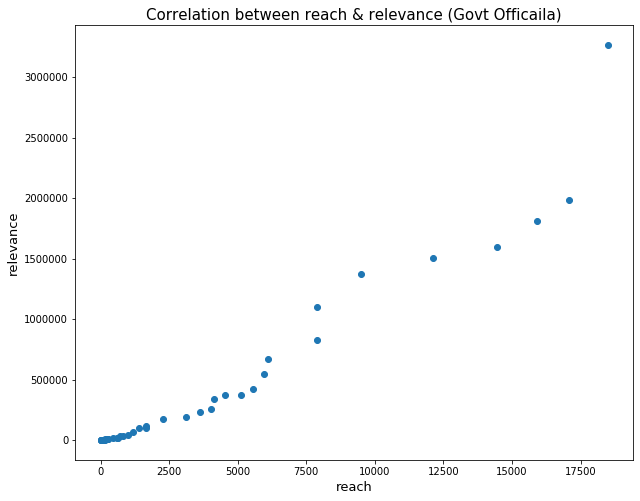

In [1507]:
plt.subplots(figsize=(10,8))
plt.scatter(x=reach_rev_corr.reach, y=reach_rev_corr.relevance, marker='o')
plt.title('Correlation between reach & relevance (Govt Officaila)', fontsize=15)
plt.xlabel('reach', fontsize=13)
plt.ylabel('relevance', fontsize=13)
plt.savefig(fname='savedCharts/africaGovt/reach_rel_corrGov.png', format='png')
plt.show()

#### Interpretaion:

> From the above computed correation coefficent of `1.0` and scatter plot, we can deduce that:
 >> there is a strongly positive correlation between`reach` and `relevance` also they are strictly increasing

- correlation between reach and popularity

In [1508]:
reach_pop_corr = pd.DataFrame(govtReach.reach.values.tolist(), govtPop.popularity.values.tolist()).reset_index()

In [1509]:
reach_pop_corr=reach_pop_corr.rename(columns={'index':'reach', 0: 'popularity'})

In [1510]:
reach_pop_corr.corr(method='spearman')

,reach,popularity
reach,1.0,1.0
popularity,1.0,1.0


In [1511]:
spearmanr(reach_pop_corr) 

SpearmanrResult(correlation=1.0, pvalue=0.0)

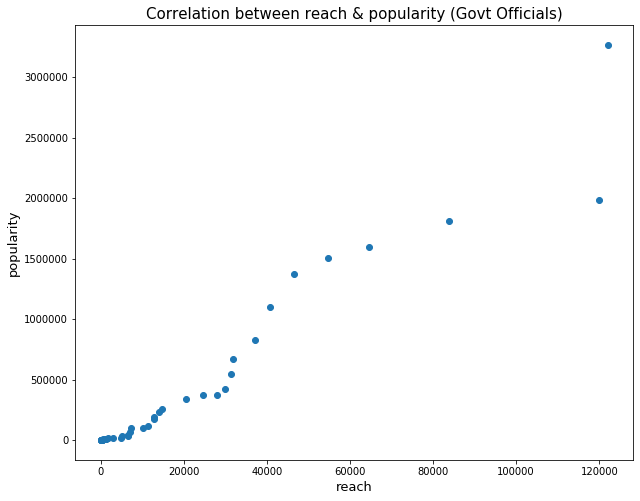

In [1512]:
plt.subplots(figsize=(10,8))
plt.scatter(x=reach_pop_corr.reach, y=reach_pop_corr.popularity, marker='o')
plt.title('Correlation between reach & popularity (Govt Officials)', fontsize=15)
plt.xlabel('reach', fontsize=13)
plt.ylabel('popularity', fontsize=13)
plt.savefig(fname='savedCharts/africaGovt/reach_pop_corrGov.png', format='png')
plt.show() 

#### Interpretaion:

> From the above computed correation coefficent of `1.0` and scatter plot, we can deduce that:
 >> there is a strongly positive correlation between`relevance` and `popularity` also they are strictly increasing

- correlation between relevance and popularity

In [1513]:
rev_pop_corr = pd.DataFrame(govtPop.popularity.values.tolist(), govtRelevance.relevance.values.tolist()).reset_index()

In [1514]:
rev_pop_corr=rev_pop_corr.rename(columns={'index':'popularity', 0: 'relevance'})

In [1515]:
rev_pop_corr.corr(method='spearman')

,popularity,relevance
popularity,1.0,1.0
relevance,1.0,1.0


In [1516]:
spearmanr(reach_rev_corr)

SpearmanrResult(correlation=1.0, pvalue=0.0)

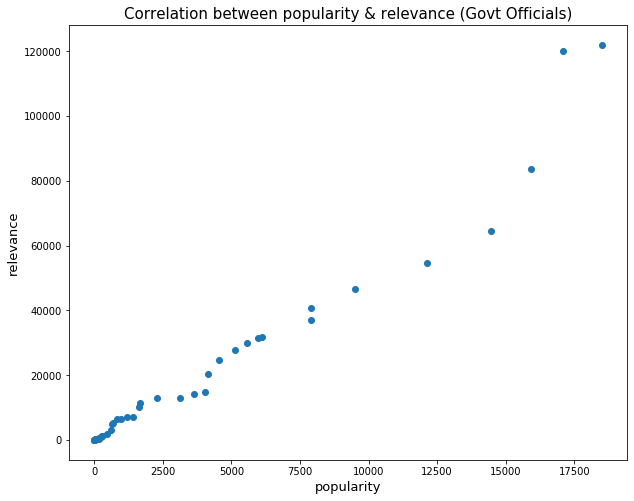

In [1517]:
plt.subplots(figsize=(10,8)) 
plt.scatter(x=rev_pop_corr.popularity, y=rev_pop_corr.relevance, marker='o')
plt.title('Correlation between popularity & relevance (Govt Officials)', fontsize=15)
plt.xlabel('popularity', fontsize=13)  
plt.ylabel('relevance', fontsize=13)
plt.savefig(fname='savedCharts/africaGovt/pop_rev_corrGov.png', format='png')
plt.show() 

#### Interpretaion:

> From the above computed correation coefficent of `1.0` and scatter plot, we can deduce that:
 >> there is a strongly positive correlation between`reach` and `relevance` also they are strictly increasing

  --------------------------------------------------------------------------------------------------------------

### Top 10 Influnetial African Personalities/Brands

#### Find Correlation between theses measures of influence among African government

##### To perform statistical inferences like correlation, we need a gaussian data,
##### however, we can do the ffg in case of a non-gaussain data

> Sort govtResponse by:

>> Influential govt by popularity

>> Influential govt by reach

>> Influential govt by relevance

> Rank users : 
>> so that the rank of 1 indicates  the  most  influential  user  and  increasing  rank  indicates a less influential user.
>> Users with the same influence value receive the average of the rank amongst the

- Sort Values by each measure of Influence

In [1518]:
afriqInfPop = afriqInfCopy.sort_values(by='popularity', axis=0, ascending=False)

In [1519]:
afriqInfReach = afriqInfCopy.sort_values(by='reach', axis=0, ascending=False)

In [1520]:
afriqInfRev = afriqInfCopy.sort_values(by='relevance', axis=0, ascending=False)

- Rank users

>> Before ranking, let's plot the distribution of each sorted data to observe whther there is a normal distribution (gaussian) or not

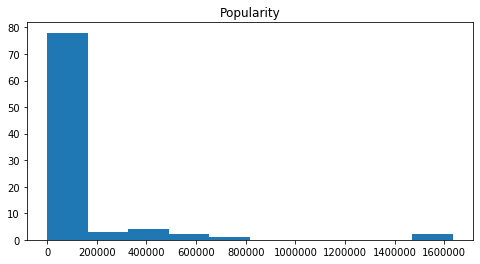

In [1521]:
plt.subplots(figsize=(8, 4))
plt.hist(afriqInfPop.popularity);
plt.title('Popularity');

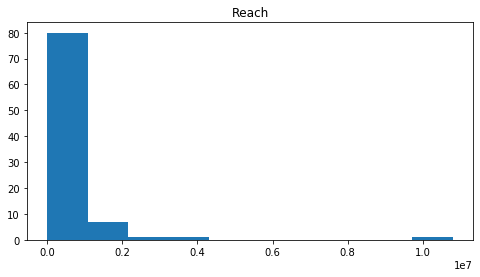

In [1522]:
plt.subplots(figsize=(8, 4))
plt.hist(afriqInfReach.reach);
plt.title('Reach');

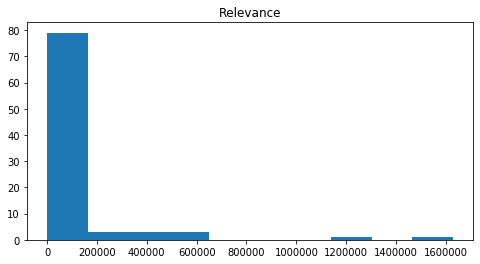

In [1523]:
plt.subplots(figsize=(8, 4))
plt.hist(afriqInfRev.relevance);
plt.title('Relevance');

>> From the above, there is no normal distribution.. 

>> hence we cannot just find the if there is a correlation among them (_pearon correlation works for normally ditributed data_), 

> To calcualte the correlation between these (sorted) data points:, 
- we have to make them ordinal by assigning rank to them 
- then use spearman correlation  to find the correlation coefficient between them 

In [1524]:
afriqInfPop.head(2)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count,popularity,reach,relevance
16,18753586,Barry Malone,malonebarry,"Executive Producer, @AJStream. Previously: Al ...",35230,2988,28426,4208,8,43,767,7317,1627597,1634914,25438,1628364
55,454904118,Mbuyiseni Ndlozi,MbuyiseniNdlozi,EFF Commissar & Member of Parliament - @EFFSou...,35927,5473,1074551,3116,11,178,861,328509,1183406,1511915,1069078,1184267


In [1525]:
afriqInfPop['ranking'] = [i+1 for i in range(len(afriqInfPop.index))]
afriqInfCopy.head(1)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count,popularity,reach,relevance
0,305125998,Jeffrey Gettleman,gettleman,South Asia bureau chief for the New York Times...,3770,37,25700,3340,1,5,38,268,111152,111420,25663,111190


In [1526]:
afriqInfReach['ranking'] = [i+1 for i in range(len(afriqInfReach.index))]

In [1527]:
afriqInfReach.head(2)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count,popularity,reach,relevance,ranking
92,46335511,Trevor Noah,Trevornoah,Comedian from South Africa. I was in the crowd...,11185,325,10803194,4054,2,0,13,136346,592755,729101,10802869,592768,1
89,14697575,News24,News24,South Africa's premier online news resource. F...,322655,631,3575424,4453,72,227,1022,204918,89815,294733,3574793,90837,2


In [1528]:
afriqInfRev['ranking'] = [i+1 for i in range(len(afriqInfRev.index))]

In [1529]:
afriqInfRev.head(2)

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count,popularity,reach,relevance,ranking
16,18753586,Barry Malone,malonebarry,"Executive Producer, @AJStream. Previously: Al ...",35230,2988,28426,4208,8,43,767,7317,1627597,1634914,25438,1628364,1
55,454904118,Mbuyiseni Ndlozi,MbuyiseniNdlozi,EFF Commissar & Member of Parliament - @EFFSou...,35927,5473,1074551,3116,11,178,861,328509,1183406,1511915,1069078,1184267,2


> Let's fimd the correlation coeeficient betweent these measure

>> Emphasis would be placed on the correlation between `popularity` & `relevance`

>> This is because reach which is measured by followership does not necessariy indicate influence

>> This would help us avoid the `million folower fallacy` discussed in the reserach paper link above

- correlation between reach and relevance

In [1530]:
Infreach_rev_corr = pd.DataFrame(afriqInfReach.reach.values.tolist(), afriqInfRev.relevance.values.tolist()).reset_index()

In [1531]:
Infreach_rev_corr=Infreach_rev_corr.rename(columns={'index':'reach', 0: 'relevance'})

In [1532]:
Infreach_rev_corr.corr(method='spearman') 

,reach,relevance
reach,1.000000,0.999992
relevance,0.999992,1.000000


In [1533]:
spearmanr(Infreach_rev_corr)

SpearmanrResult(correlation=0.9999917684972155, pvalue=2.849648624460546e-212)

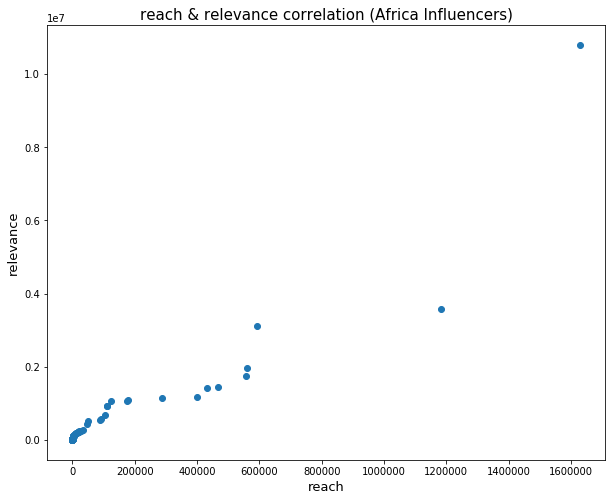

In [1534]:
plt.subplots(figsize=(10,8))
plt.scatter(x=Infreach_rev_corr.reach, y=Infreach_rev_corr.relevance, marker='o')
plt.title('reach & relevance correlation (Africa Influencers)', fontsize=15)
plt.xlabel('reach', fontsize=13)
plt.ylabel('relevance', fontsize=13)
plt.savefig(fname='savedCharts/africaInfluencers/Infreach_rel_corr.png', format='png')
plt.show()

#### Interpretaion:

> From the above computed correation coefficent of `0.9` and scatter plot, we can deduce that:
 >> there is a strongly positive correlation between`reach` and `relevance` but not strictly increasing

- correlation between reach and popularity

In [1535]:
Infreach_pop_corr = pd.DataFrame(afriqInfReach.reach.values.tolist(), afriqInfPop.popularity.values.tolist()).reset_index()

In [1536]:
Infreach_pop_corr=Infreach_pop_corr.rename(columns={'index':'reach', 0: 'popularity'})

In [1537]:
Infreach_pop_corr.corr(method='spearman')

,reach,popularity
reach,1.000000,0.999988
popularity,0.999988,1.000000


In [1538]:
spearmanr(Infreach_pop_corr) 

SpearmanrResult(correlation=0.9999876527204139, pvalue=1.5951754558735378e-204)

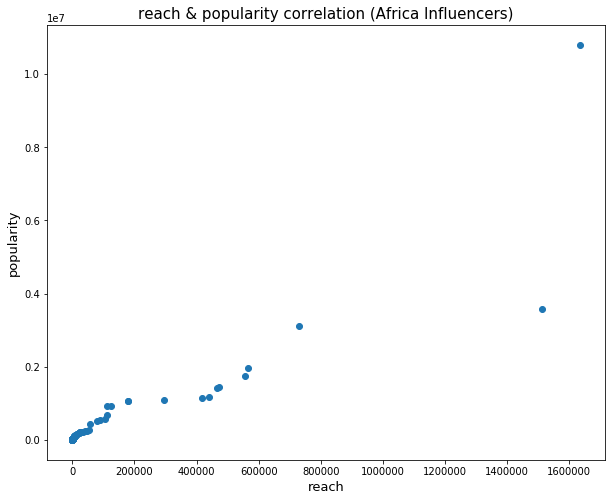

In [1539]:
plt.subplots(figsize=(10,8))
plt.scatter(x=Infreach_pop_corr.reach, y=Infreach_pop_corr.popularity, marker='o')
plt.title('reach & popularity correlation (Africa Influencers)', fontsize=15)
plt.xlabel('reach', fontsize=13)
plt.ylabel('popularity', fontsize=13)
plt.savefig(fname='savedCharts/africaInfluencers/Infreach_pop_corr.png', format='png')
plt.show() 

#### Interpretaion:

> From the above computed correation coefficent of `0.9` and scatter plot, we can deduce that:
 >> there is a strongly positive correlation between`reach` and `popularity` but not strictly increasing

- correlation between relevance and popularity

In [1540]:
Infrev_pop_corr = pd.DataFrame(afriqInfPop.popularity.values.tolist(), afriqInfRev.relevance.values.tolist()).reset_index()

In [1541]:
Infrev_pop_corr=Infrev_pop_corr.rename(columns={'index':'popularity', 0: 'relevance'})

In [1542]:
Infrev_pop_corr.corr(method='spearman')

,popularity,relevance
popularity,1.000000,0.999975
relevance,0.999975,1.000000


In [1543]:
spearmanr(Infrev_pop_corr)

SpearmanrResult(correlation=0.9999753050935641, pvalue=2.807270424318346e-191)

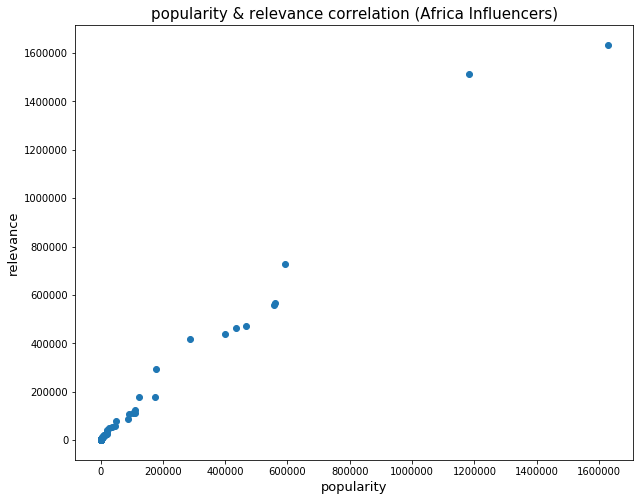

In [1544]:
plt.subplots(figsize=(10,8)) 
plt.scatter(x=Infrev_pop_corr.popularity, y=Infrev_pop_corr.relevance, marker='o')
plt.title('popularity & relevance correlation (Africa Influencers)', fontsize=15)
plt.xlabel('popularity', fontsize=13)  
plt.ylabel('relevance', fontsize=13)
plt.savefig(fname='savedCharts/africaInfluencers/Infpop_rev_corr.png', format='png')
plt.show() 

#### Interpretaion:

> From the above computed correation coefficent of `0.9` and scatter plot, we can deduce that:
 >> there is a strongly positive correlation between`popularity` and `relevance` but they are not strictly increasing

#### Top ten Influential Governemnt in Africa across board

> Popularity

In [1545]:
mostPopularGovt = govtPop[['name', 'screen_name', 'popularity', 'ranking']].head(10)
mostPopularGovt

,name,screen_name,popularity,ranking
26,Nana Akufo-Addo,NAkufoAddo,122057,1
13,Abdalla Hamdok,SudanPMHamdok,120014,2
32,Muhammadu Buhari,MBuhari,83764,3
15,Yoweri K Museveni,KagutaMuseveni,64678,4
33,Macky Sall,Macky_Sall,54732,5
39,Abiy Ahmed Ali 🇪🇹,AbiyAhmedAli,46599,6
24,Alassane Ouattara,AOuattara_PRCI,40757,7
4,Presidency | South Africa 🇿🇦,PresidencyZA,37143,8
19,Présidence RDC 🇨🇩,Presidence_RDC,31853,9
6,President of Zimbabwe,edmnangagwa,31427,10


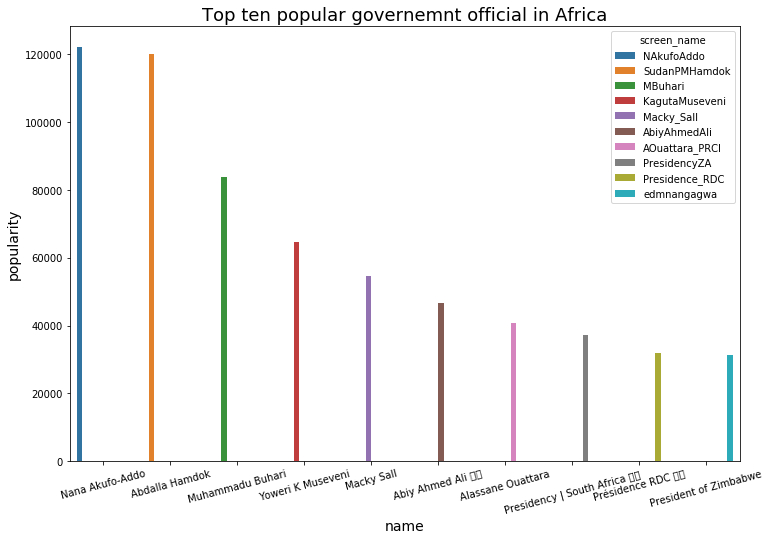

In [1546]:
plt.subplots(figsize=(12,8))
sns.barplot(x='name', y='popularity', data=mostPopularGovt, hue='screen_name')
plt.xticks(rotation=15)
plt.title('Top ten popular governemnt official in Africa', fontsize=18)
plt.xlabel('name', fontsize=14)
plt.ylabel('popularity', fontsize=14)
plt.savefig(fname='savedCharts/africaGovt/mostPopularGovt.png', format='png')
plt.show() 

> Reach

In [1547]:
mostReachedGovt = govtReach[['name', 'screen_name', 'reach', 'ranking']].head(10)
mostReachedGovt

,name,screen_name,reach,ranking
32,Muhammadu Buhari,MBuhari,3268929,1
10,Paul Kagame,PaulKagame,1981573,2
15,Yoweri K Museveni,KagutaMuseveni,1810509,3
4,Presidency | South Africa 🇿🇦,PresidencyZA,1597646,4
26,Nana Akufo-Addo,NAkufoAddo,1504978,5
33,Macky Sall,Macky_Sall,1373434,6
9,State House Kenya,StateHouseKenya,1102458,7
24,Alassane Ouattara,AOuattara_PRCI,830659,8
40,President Paul BIYA,PR_Paul_BIYA,673920,9
6,President of Zimbabwe,edmnangagwa,545460,10


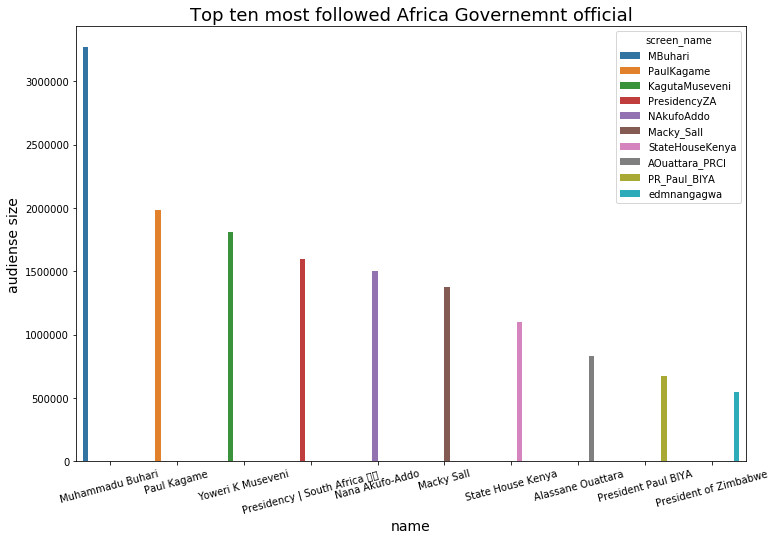

In [1548]:
plt.subplots(figsize=(12,8))
sns.barplot(x='name', y='reach', data=mostReachedGovt, hue='screen_name')
plt.xticks(rotation=15)
plt.title('Top ten most followed Africa Governemnt official', fontsize=18)
plt.xlabel('name', fontsize=14)
plt.ylabel('audiense size', fontsize=14)
plt.savefig(fname='savedCharts/africaGovt/mostReachedGovt.png', format='png')
plt.show() 

> Relevance

In [1549]:
mostRelevantGovt = govtRelevance[['name', 'screen_name', 'relevance', 'ranking']].head(10)
mostRelevantGovt

,name,screen_name,relevance,ranking
17,Amb. Willy Nyamitwe,willynyamitwe,18494,1
13,Abdalla Hamdok,SudanPMHamdok,17085,2
26,Nana Akufo-Addo,NAkufoAddo,15926,3
32,Muhammadu Buhari,MBuhari,14460,4
4,Presidency | South Africa 🇿🇦,PresidencyZA,12113,5
14,TanzaniaSpokesperson,TZSpokesperson,9493,6
15,Yoweri K Museveni,KagutaMuseveni,7894,7
33,Macky Sall,Macky_Sall,7883,8
6,President of Zimbabwe,edmnangagwa,6099,9
9,State House Kenya,StateHouseKenya,5961,10


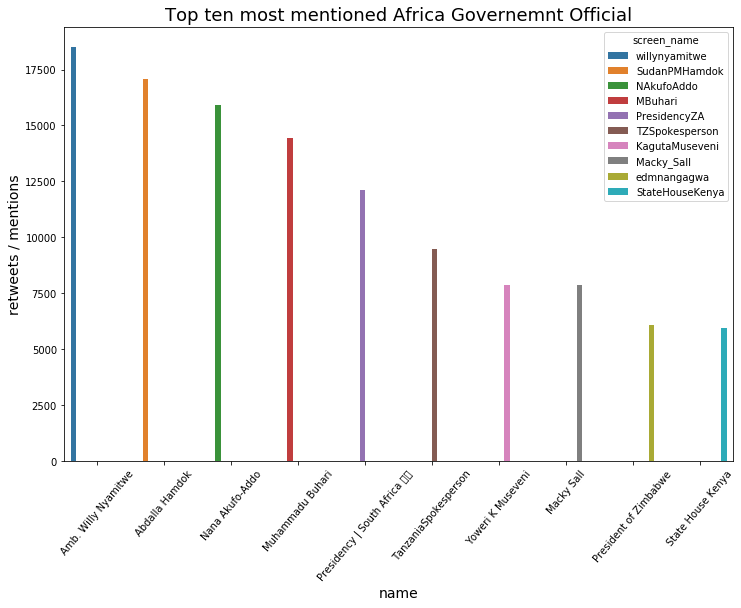

In [1550]:
plt.subplots(figsize=(12,8))
sns.barplot(x='name', y='relevance', data=mostRelevantGovt, hue='screen_name')
plt.xticks(rotation=50)
plt.title('Top ten most mentioned Africa Governemnt Official', fontsize=18)
plt.xlabel('name', fontsize=14)
plt.ylabel('retweets / mentions', fontsize=14)
plt.savefig(fname='savedCharts/africaGovt/mostRelevantGovt.png', format='png')
plt.show() 

> Who are the most Influential Goverment Official in Africa accross board

In [1551]:
popularGovt = set(mostPopularGovt.name)
reachedGovt = set(mostReachedGovt.name)
relevantGovt = set (mostRelevantGovt.name)

In [1552]:
mostInfluentialGovt = popularGovt.intersection(reachedGovt).intersection(relevantGovt)

In [1553]:
mostInfluentialGovt

{'Macky Sall',
 'Muhammadu Buhari',
 'Nana Akufo-Addo',
 'Presidency | South Africa 🇿🇦',
 'President of Zimbabwe',
 'Yoweri K Museveni'}

>> Word Cloud of Most Influential African Govt Officials on Twitter

In [1554]:
mostInfluentialGovt = {'Macky_Sall ',
 'Muhammadu_Buhari ',
 'Nana_Akufo_Addo ',
 'Presidency_South_Africa ',
 'President_of_Zimbabwe ',
 'Yoweri_K_Museveni '}

In [1555]:
df = pd.DataFrame(mostInfluentialGovt, columns=['most_influential'])
df

,most_influential
0,Yoweri_K_Museveni
1,Nana_Akufo_Addo
2,Muhammadu_Buhari
3,President_of_Zimbabwe
4,Macky_Sall
5,Presidency_South_Africa


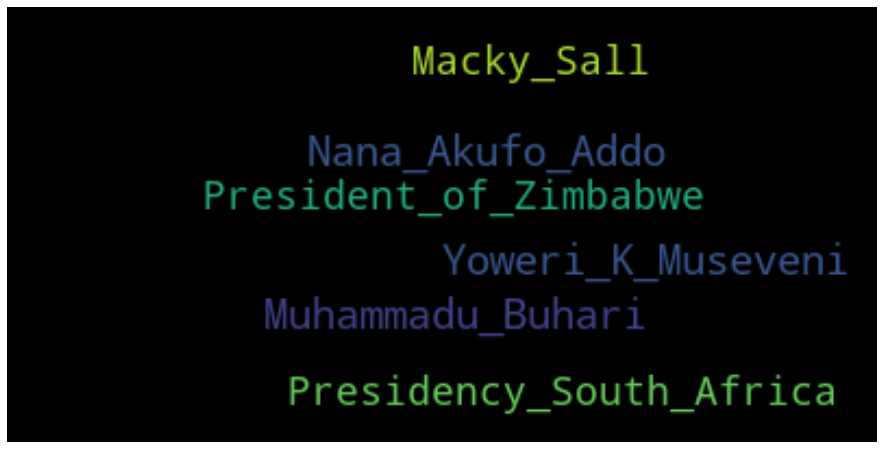

In [1556]:
text = "".join(name for name in df.most_influential)

wordcloud = WordCloud(max_font_size=20, max_words=10, background_color="black").generate(text)
plt.figure(figsize=(20,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
wordcloud.to_file("savedCharts/africaGovt/mostInfluentialGovt.png")
plt.show()

In [1557]:
africa = np.array(Image.open("savedCharts/africaGovt/africa.png"))

In [1558]:
africa

array([[ 4,  4,  4, ...,  3,  3,  3],
       [ 4,  4,  4, ...,  3,  3,  3],
       [ 1,  4,  4, ...,  3,  3,  3],
       ...,
       [ 4,  7,  4, ..., 10, 10, 10],
       [ 1,  4,  4, ...,  3,  3,  3],
       [ 4,  1,  1, ...,  3,  3,  3]], dtype=uint8)

In [1559]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [1560]:
# Transform your mask into a new one that will work with the function:
transformed_africa = np.ndarray((africa.shape[0],africa.shape[1]), np.int32)

for i in range(len(africa)):
    transformed_africa[i] = list(map(transform_format, africa[i]))

In [1561]:
transformed_africa

array([[ 4,  4,  4, ...,  3,  3,  3],
       [ 4,  4,  4, ...,  3,  3,  3],
       [ 1,  4,  4, ...,  3,  3,  3],
       ...,
       [ 4,  7,  4, ..., 10, 10, 10],
       [ 1,  4,  4, ...,  3,  3,  3],
       [ 4,  1,  1, ...,  3,  3,  3]], dtype=int32)

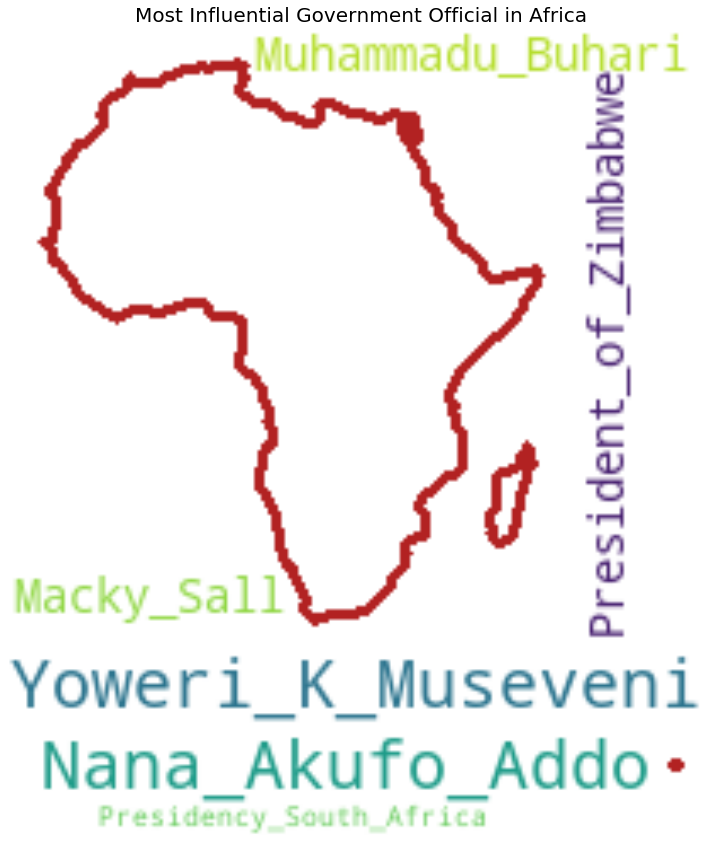

In [1562]:
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_africa,
              contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("savedCharts/africaGovt/mostInfluentialGovt.png")

# show
plt.figure(figsize=[20,15])
plt.imshow(wc, interpolation='bilinear')
plt.title('Most Influential Government Official in Africa', fontsize=20)
plt.axis("off")
plt.show()

#### Top ten Influencers in Africa across board

> Popularity

In [1563]:
mostPopularInf = afriqInfPop[['name', 'screen_name', 'popularity', 'ranking']].head(10)
mostPopularInf

,name,screen_name,popularity,ranking
16,Barry Malone,malonebarry,1634914,1
55,Mbuyiseni Ndlozi,MbuyiseniNdlozi,1511915,2
92,Trevor Noah,Trevornoah,729101,3
84,Loyiso Gola,loyisogola,566351,4
64,Jendayi E Frazer,JendayiFrazer,557712,5
30,Rebecca Enonchong,africatechie,471808,6
88,Julius Sello Malema,Julius_S_Malema,464563,7
59,Geoffrey York,geoffreyyork,440079,8
2,Scapegoat,AndiMakinana,417561,9
89,News24,News24,294733,10


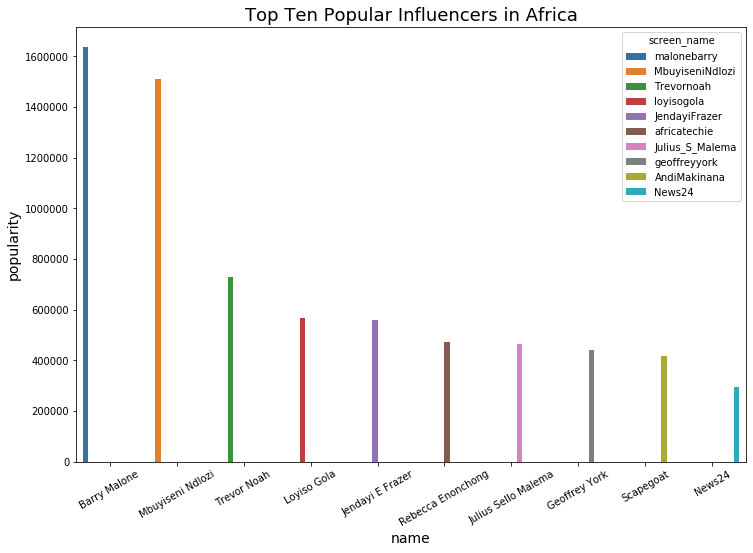

In [1564]:
plt.subplots(figsize=(12,8))
sns.barplot(x='name', y='popularity', data=mostPopularInf, hue='screen_name')
plt.xticks(rotation=30)
plt.title('Top Ten Popular Influencers in Africa', fontsize=18)
plt.xlabel('name', fontsize=14)
plt.ylabel('popularity', fontsize=14)
plt.savefig(fname='savedCharts/africaInfluencers/mostPopularInf.png', format='png')
plt.show()

> Reach

In [1565]:
mostReachedInf = afriqInfReach[['name', 'screen_name', 'reach', 'ranking']].head(10)
mostReachedInf

,name,screen_name,reach,ranking
92,Trevor Noah,Trevornoah,10802869,1
89,News24,News24,3574793,2
88,Julius Sello Malema,Julius_S_Malema,3125594,3
91,Gareth Cliff,GarethCliff,1974120,4
79,Euphonik™♛,euphonik,1754206,5
87,Helen Zille,helenzille,1440916,6
82,MTV Base Africa,MTVBaseAfrica,1415474,7
85,5FM,5FM,1163787,8
81,Cricket South Africa,OfficialCSA,1157686,9
84,Loyiso Gola,loyisogola,1081210,10


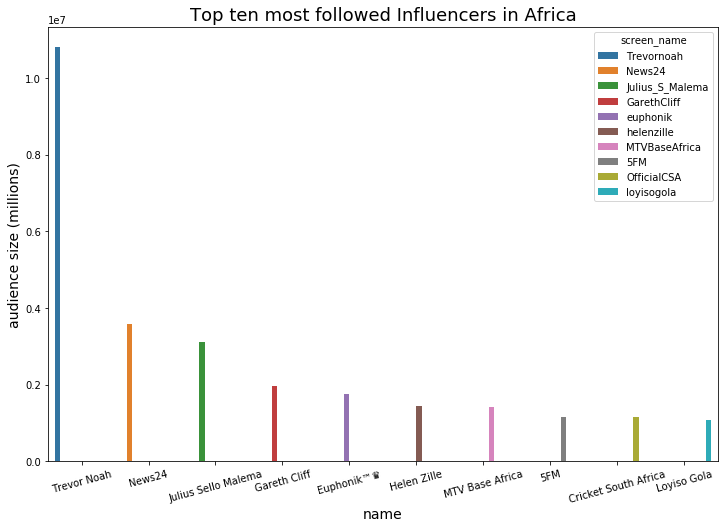

In [1566]:
plt.subplots(figsize=(12,8))
sns.barplot(x='name', y='reach', data=mostReachedInf, hue='screen_name')
plt.xticks(rotation=15)
plt.title('Top ten most followed Influencers in Africa', fontsize=18)
plt.xlabel('name', fontsize=14)
plt.ylabel('audience size (millions)', fontsize=14)
plt.savefig(fname='savedCharts/africaInfluencers/mostFollowedInf.png', format='png')
plt.show() 

> Relevance

In [1567]:
mostRelevantInf = afriqInfRev[['name', 'screen_name', 'relevance', 'ranking']].head(10)
mostRelevantInf

,name,screen_name,relevance,ranking
16,Barry Malone,malonebarry,1628364,1
55,Mbuyiseni Ndlozi,MbuyiseniNdlozi,1184267,2
92,Trevor Noah,Trevornoah,592768,3
84,Loyiso Gola,loyisogola,560281,4
64,Jendayi E Frazer,JendayiFrazer,557720,5
30,Rebecca Enonchong,africatechie,465908,6
59,Geoffrey York,geoffreyyork,433433,7
2,Scapegoat,AndiMakinana,398721,8
88,Julius Sello Malema,Julius_S_Malema,287231,9
24,Kate Forbes,forbeesta,179298,10


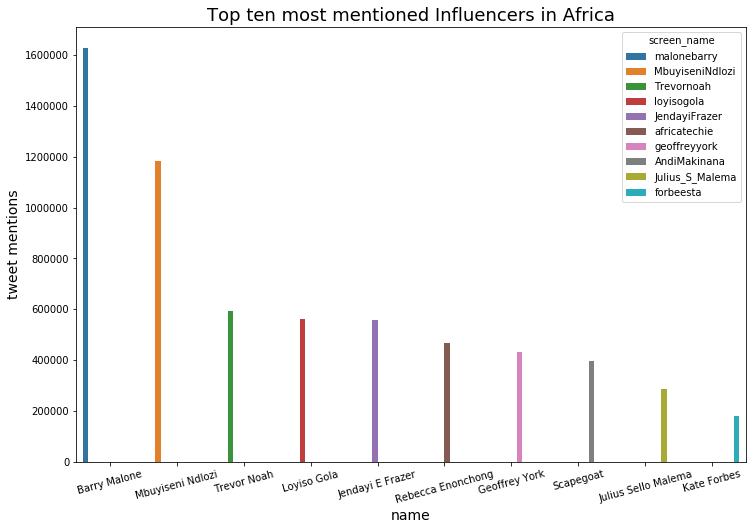

In [1568]:
plt.subplots(figsize=(12,8))
sns.barplot(x='name', y='relevance', data=mostRelevantInf, hue='screen_name')
plt.xticks(rotation=15)
plt.title('Top ten most mentioned Influencers in Africa', fontsize=18)
plt.xlabel('name', fontsize=14)
plt.ylabel('tweet mentions', fontsize=14)
plt.savefig(fname='savedCharts/africaInfluencers/mostRelevantInf.png', format='png')
plt.show() 

> Who are the most Influential Perosnality/Brands in Africa accross board

In [1569]:
popularInf = set(mostPopularInf.name)
reachedInf = set(mostReachedInf.name)
relevantInf = set (mostRelevantInf.name)

In [1570]:
mostInfluentialInf = popularInf.intersection(reachedInf).intersection(relevantInf)

In [1571]:
mostInfluentialInf

{'Julius Sello Malema', 'Loyiso Gola', 'Trevor Noah'}

>> Word Cloud of Most Influential African Govt Officials on Twitter

In [1572]:
mostInfluentialInf = {'Julius_Sello_Malema ', 'Loyiso_Gola ', 'Trevor_Noah '}

In [1573]:
df = pd.DataFrame(mostInfluentialInf, columns=['most_influential'])
df

,most_influential
0,Loyiso_Gola
1,Julius_Sello_Malema
2,Trevor_Noah


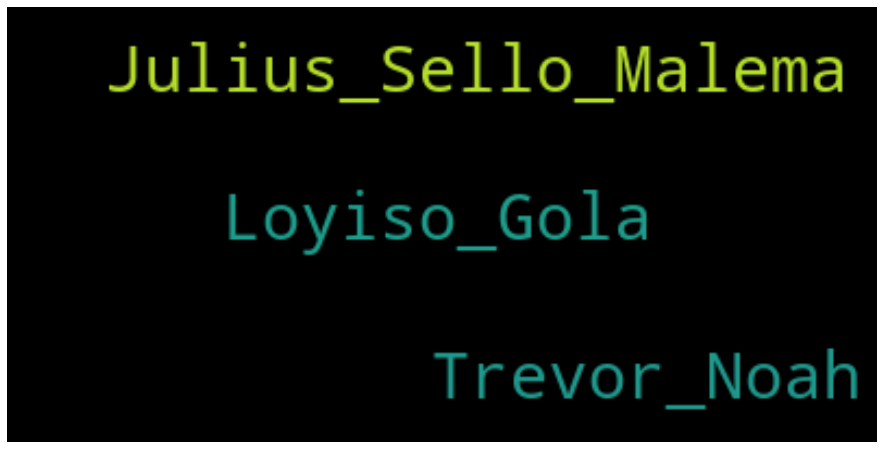

In [1574]:
text = "".join(name for name in df.most_influential)

wordcloud = WordCloud(max_font_size=30, max_words=10, background_color="black").generate(text)
plt.figure(figsize=(20,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
wordcloud.to_file("savedCharts/africaGovt/mostInfluentialGovt.png")
plt.show()

In [1575]:
africa = np.array(Image.open("savedCharts/africaGovt/africa.png"))

In [1576]:
africa

array([[ 4,  4,  4, ...,  3,  3,  3],
       [ 4,  4,  4, ...,  3,  3,  3],
       [ 1,  4,  4, ...,  3,  3,  3],
       ...,
       [ 4,  7,  4, ..., 10, 10, 10],
       [ 1,  4,  4, ...,  3,  3,  3],
       [ 4,  1,  1, ...,  3,  3,  3]], dtype=uint8)

In [1577]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [1578]:
# Transform your mask into a new one that will work with the function:
transformed_africa = np.ndarray((africa.shape[0],africa.shape[1]), np.int32)

for i in range(len(africa)):
    transformed_africa[i] = list(map(transform_format, africa[i]))

In [1579]:
transformed_africa

array([[ 4,  4,  4, ...,  3,  3,  3],
       [ 4,  4,  4, ...,  3,  3,  3],
       [ 1,  4,  4, ...,  3,  3,  3],
       ...,
       [ 4,  7,  4, ..., 10, 10, 10],
       [ 1,  4,  4, ...,  3,  3,  3],
       [ 4,  1,  1, ...,  3,  3,  3]], dtype=int32)

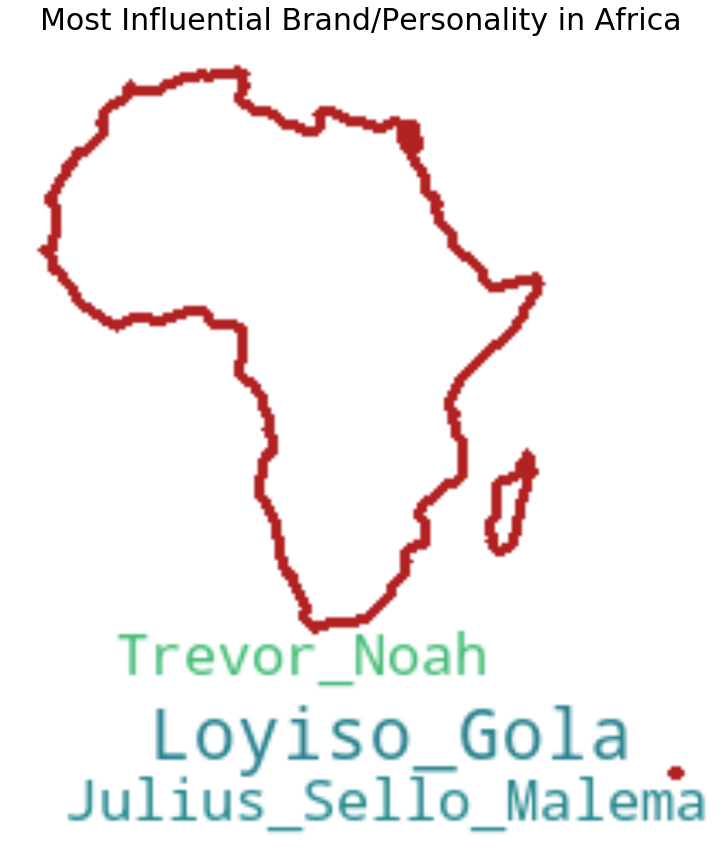

In [1580]:
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_africa,
              contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("savedCharts/africaGovt/mostInfluentialInf.png")

# show
plt.figure(figsize=[20,15])
plt.imshow(wc, interpolation='bilinear')
plt.title('Most Influential Brand/Personality in Africa', fontsize=30)
plt.axis("off")
plt.show()

<a id="r2"></a>

#### Research Question 2: 

 > Popular narratives among theses influencers (governmental & non-governmental) :
        
   >> What are the top 5 (most used) hahstags among the influencers

### Government Hashtags

In [1581]:
govtResHashCopy.head()

,hashtags,id,name,screen_name,hashtags_count
0,52YearsOfFriendship,1181832897508065280,Eswatini Government,EswatiniGovern1,3
1,AdventureTime,1181832897508065280,Eswatini Government,EswatiniGovern1,1
2,AfricaDay,1181832897508065280,Eswatini Government,EswatiniGovern1,1
3,AllHandsOnDeck,1181832897508065280,Eswatini Government,EswatiniGovern1,1
4,BottomLineSABC,1181832897508065280,Eswatini Government,EswatiniGovern1,1


In [1582]:
govtResHashCopy.sort_values(by='hashtags_count', inplace=True, ascending=False)

In [1583]:
govtResHashCopy[govtResHashCopy.hashtags.duplicated()]

,hashtags,id,name,screen_name,hashtags_count
7,COVID19,1181832897508065280,Eswatini Government,EswatiniGovern1,351
1417,COVID19,894266976499060736,MinSantédj,MinSantedj,79
422,SONA2017,2189970192,Malawi Government,MalawiGovt,60
6084,G5Sahel,389486048,Presidence Mali,PresidenceMali,58
131,COVID19,2189970192,Malawi Government,MalawiGovt,42
...,...,...,...,...,...
3130,enfants,2216872019,Chérif Mahamat Zene,Cherif_MZ,1
3160,Afrique,817736921027854336,Présidence RDC 🇨🇩,Presidence_RDC,1
3155,Abuja,817736921027854336,Présidence RDC 🇨🇩,Presidence_RDC,1
3132,kebetu,2216872019,Chérif Mahamat Zene,Cherif_MZ,1


> Let's check the values counts in pur hashtags

In [1584]:
pd.Series(govtResHashCopy.hashtags.value_counts()).reset_index().head(50)

,index,hashtags
0,COVID19,32
1,UNGA,20
2,Coronavirus,18
3,coronavirus,18
4,Africa,17
5,Covid19,16
6,Rwanda,16
7,Nigeria,15
8,Ghana,15
9,France,14


>> Covid 19 and Corona Virus are the same but have different formatting here

>> We need to use a single name to describe every instance of corona virus

>> I would be using covid19 for everything covid

In [1585]:
govtResHashCopy['hashtags']=govtResHashCopy.hashtags.str.lower()

In [1586]:
govtResHashCopy

,hashtags,id,name,screen_name,hashtags_count
6096,ibk,389486048,Presidence Mali,PresidenceMali,1751
2509,burundi,337183326,Amb. Willy Nyamitwe,willynyamitwe,1194
3456,rdc,817736921027854336,Présidence RDC 🇨🇩,Presidence_RDC,1167
874,ramaphosa,40839292,Presidency | South Africa 🇿🇦,PresidencyZA,1079
305,malawi,2189970192,Malawi Government,MalawiGovt,779
...,...,...,...,...,...
3137,16janvier,817736921027854336,Présidence RDC 🇨🇩,Presidence_RDC,1
3135,procèshabre,2216872019,Chérif Mahamat Zene,Cherif_MZ,1
3134,peacekeepers,2216872019,Chérif Mahamat Zene,Cherif_MZ,1
3133,panamapapers,2216872019,Chérif Mahamat Zene,Cherif_MZ,1


> get list of all instances of covid

In [1587]:
covid_list = govtResHashCopy[govtResHashCopy.hashtags.str.contains('covi|corona')]['hashtags'].values.tolist()

In [1588]:
covid_list

['covid19',
 'covid19',
 'coronavirussa',
 'covid19',
 'covid19bj',
 'covid19dj',
 'coronavirus',
 'covid19',
 'covid19',
 'covid19',
 'covid19_cg',
 'coronavirus',
 'covid19',
 'stopcoronavirus',
 'komeshacorona',
 'coronavirus',
 'coronavirus',
 'coronavirus',
 'covid19',
 'covid19bj',
 'covid19',
 'covid19',
 'covidー19',
 'covid19',
 'covidー19',
 'covid19measuressc',
 'coronavirus',
 'covid19bj',
 'covid19sa',
 'covid',
 'coronavirussa',
 'coronavirus',
 'covid',
 'covid19',
 'forcecovid19',
 'covid19',
 'covid19ci',
 'covid19',
 'coronavirus',
 'covid19',
 'covid19',
 'covid19',
 'coronavirus',
 'covid19',
 'covid19',
 'covid__19',
 'covid19gambia',
 'covid19',
 'covid19',
 'covid_19',
 'covid19',
 'coronavirus',
 'coronavirus',
 'stopcoronavirus',
 'covid_19',
 'covid19',
 'covid19',
 'coronavirus',
 'covid19ss',
 'covid19',
 'covid19kenya',
 'covid19',
 'covid19',
 'coronavirus',
 'stopcoronavirusrdc',
 'covid19',
 'covid19ci',
 'covid19',
 'covid_19',
 'covid',
 'covid19',
 'cor

In [1589]:
govtResHashCopy.head()

,hashtags,id,name,screen_name,hashtags_count
6096,ibk,389486048,Presidence Mali,PresidenceMali,1751
2509,burundi,337183326,Amb. Willy Nyamitwe,willynyamitwe,1194
3456,rdc,817736921027854336,Présidence RDC 🇨🇩,Presidence_RDC,1167
874,ramaphosa,40839292,Presidency | South Africa 🇿🇦,PresidencyZA,1079
305,malawi,2189970192,Malawi Government,MalawiGovt,779


In [1590]:
# govtResHashCopy.hashtags2= 

In [1591]:
govtResHashCopy.hashtags.replace(covid_list, 'covid19', inplace=True)

> Test

In [1592]:
govtResHashCopy[govtResHashCopy.hashtags.str.contains('cov.|corona', regex=True)]

,hashtags,id,name,screen_name,hashtags_count
752,covid19,40839292,Presidency | South Africa 🇿🇦,PresidencyZA,393
7,covid19,1181832897508065280,Eswatini Government,EswatiniGovern1,351
763,covid19,40839292,Presidency | South Africa 🇿🇦,PresidencyZA,92
1417,covid19,894266976499060736,MinSantédj,MinSantedj,79
3944,covid19,2853870821,Présidence du Bénin,PresidenceBenin,49
...,...,...,...,...,...
3202,covid19,817736921027854336,Présidence RDC 🇨🇩,Presidence_RDC,1
3201,covid19,817736921027854336,Présidence RDC 🇨🇩,Presidence_RDC,1
3242,covid19,817736921027854336,Présidence RDC 🇨🇩,Presidence_RDC,1
3246,covid19,817736921027854336,Présidence RDC 🇨🇩,Presidence_RDC,1


In [1593]:
govtResHashCopy.hashtags.value_counts().sort_values(ascending=False)

covid19           232
unga               21
africa             20
rwanda             17
nigeria            16
                 ... 
sgmaec              1
march               1
sustainability      1
antibiotics         1
opensi              1
Name: hashtags, Length: 5547, dtype: int64

>> Group By hashtags

In [1594]:
govtResHashGrouped = govtResHashCopy.groupby(['hashtags',])['hashtags_count'].sum()

In [1595]:
govtResHashGrouped = pd.DataFrame(govtResHashGrouped).sort_values(by='hashtags_count', ascending=False).reset_index()

In [1596]:
govtResHashGrouped

,hashtags,hashtags_count
0,covid19,2069
1,ibk,1759
2,burundi,1234
3,rdc,1198
4,ramaphosa,1079
...,...,...
5542,independanceday,1
5543,independancetogo,1
5544,independenceday2018,1
5545,independencedayanniversary,1


> Group by hashtags and name

In [1597]:
govtResHashGrouped2 = govtResHashCopy.groupby(['hashtags','name',])['hashtags_count'].count()#.sort_values(by='hashtags_count')

In [1598]:
govtResHashGrouped2=pd.DataFrame(govtResHashGrouped2).sort_values(by='hashtags_count', ascending=False).reset_index()

In [1599]:
govtResHashGrouped2

,hashtags,name,hashtags_count
0,covid19,State House of The Gambia,21
1,covid19,MinSantédj,18
2,covid19,Presidency | South Africa 🇿🇦,16
3,covid19,Présidence RDC 🇨🇩,15
4,covid19,Présidence du Bénin,12
...,...,...,...
7396,focacbeijing2018,State House of The Gambia,1
7397,focac2018,President Paul BIYA,1
7398,focac2018,Malawi Government,1
7399,focac2018,Ali Bongo Ondimba,1


### Influencers Hashtags

In [1600]:
afriqInfHashCopy.head()

,hashtags,id,name,screen_name,hashtags_count
0,2015NepalBlockade,305125998,Jeffrey Gettleman,gettleman,1
1,6PM,305125998,Jeffrey Gettleman,gettleman,1
2,ARYNews,305125998,Jeffrey Gettleman,gettleman,1
3,Abhinandan,305125998,Jeffrey Gettleman,gettleman,1
4,Adani,305125998,Jeffrey Gettleman,gettleman,1


In [1601]:
afriqInfHashCopy.sort_values(by='hashtags_count', inplace=True, ascending=False)

In [1602]:
afriqInfHashCopy[afriqInfHashCopy.hashtags.duplicated()]

,hashtags,id,name,screen_name,hashtags_count
22303,Africa,127625168,HowWeMadeItInAfrica,MadeItInAfrica,576
21852,COVID19,57339160,CNBC Africa,cnbcafrica,560
16495,Africa,196187990,Ranger Diaries,rangerdiaries,484
4544,COVID19,149052206,City of Tshwane,CityTshwane,356
24562,Africa,140003488,IFC Africa,IFCAfrica,308
...,...,...,...,...,...
14861,Christmas,41572208,Save the Rhino,savetherhino,1
14872,Covid_19,41572208,Save the Rhino,savetherhino,1
14869,Covid,41572208,Save the Rhino,savetherhino,1
14868,CoronavirusOutbreak,41572208,Save the Rhino,savetherhino,1


> Let's check the values counts in pur hashtags

In [1603]:
pd.Series(afriqInfHashCopy.hashtags.value_counts()).reset_index().head(50)

,index,hashtags
0,Africa,59
1,SouthAfrica,58
2,COVID19,56
3,African,42
4,coronavirus,42
5,Ethiopia,41
6,Kenya,41
7,Tanzania,38
8,Nigeria,37
9,Zimbabwe,36


>> Covid 19 and Corona Virus are the same but have different formatting here

>> We need to use a single name to describe every instance of corona virus

>> I would be using covid19 for everything covid

In [1604]:
afriqInfHashCopy['hashtags']=afriqInfHashCopy.hashtags.str.lower()

In [1605]:
afriqInfHashCopy

,hashtags,id,name,screen_name,hashtags_count
8710,liveamp,76306478,Live Amp,liveamp,887
23962,africa,292403049,AfricaProgressPanel,africaprogress,852
15279,covid19,334739944,GautengGov,GautengProvince,767
12131,knysna,142396796,marais,cx73,713
22303,africa,127625168,HowWeMadeItInAfrica,MadeItInAfrica,576
...,...,...,...,...,...
14865,conservationheroes,41572208,Save the Rhino,savetherhino,1
14864,coincarving,41572208,Save the Rhino,savetherhino,1
14863,coinart,41572208,Save the Rhino,savetherhino,1
14862,climatestrike,41572208,Save the Rhino,savetherhino,1


> get list of all instances of covid

In [1606]:
covid_list2 = afriqInfHashCopy[afriqInfHashCopy.hashtags.str.contains('covi|corona')]['hashtags'].values.tolist()

In [1607]:
covid_list2

['covid19',
 'covid19',
 'covid19',
 'gautengcovid19',
 'covid19',
 'covid19insa',
 'covid19',
 'covid19sa',
 'covid19',
 'coronavirus',
 'coronavirus',
 'covid19',
 'covid19southafrica',
 'coronavirus',
 'covid19',
 'covidー19',
 'covid19',
 'covid_19sa',
 'covid19',
 'covid19',
 'covid19',
 'covid19',
 'coronavirus',
 'coronavirus',
 'covid19',
 'covid19sa',
 'covid19',
 'coronavirus',
 'covid19',
 'covid_19',
 'coronavirus',
 'coronavirusinsa',
 'covid19sa',
 'covid19',
 'coronavirus',
 'covid19',
 'coronaviruspandemic',
 'coronavirus',
 'covid19insa',
 'covid19',
 'covid_19',
 'coronavirus',
 'covid19',
 'covid19',
 'covid19sa',
 'covid19',
 'gautengcovid19',
 'coronavirussa',
 'covid19',
 'covid_19',
 'covid19insa',
 'covid19',
 'covid_19',
 'covid19sa',
 'coronavirus',
 'covid19',
 'covid19',
 'covidー19',
 'covid19sa',
 'coronavirus',
 'coronavirusoutbreak',
 'covid19',
 'covid__19',
 'covid19southafrica',
 'covid19insa',
 'gautengcovid19',
 'covid19sa',
 'coronavirus',
 'covid19'

In [1608]:
afriqInfHashCopy.head()

,hashtags,id,name,screen_name,hashtags_count
8710,liveamp,76306478,Live Amp,liveamp,887
23962,africa,292403049,AfricaProgressPanel,africaprogress,852
15279,covid19,334739944,GautengGov,GautengProvince,767
12131,knysna,142396796,marais,cx73,713
22303,africa,127625168,HowWeMadeItInAfrica,MadeItInAfrica,576


In [1609]:
afriqInfHashCopy.hashtags.replace(covid_list, 'covid19', inplace=True)

> Test

In [1610]:
afriqInfHashCopy[afriqInfHashCopy.hashtags.str.contains('cov.|corona', regex=True)]

,hashtags,id,name,screen_name,hashtags_count
15279,covid19,334739944,GautengGov,GautengProvince,767
21852,covid19,57339160,CNBC Africa,cnbcafrica,560
4544,covid19,149052206,City of Tshwane,CityTshwane,356
15311,gautengcovid19,334739944,GautengGov,GautengProvince,187
18033,covid19,18017198,The Africa Report,TheAfricaReport,158
...,...,...,...,...,...
14857,covid19,41572208,Save the Rhino,savetherhino,1
14872,covid19,41572208,Save the Rhino,savetherhino,1
14871,covidlockdown,41572208,Save the Rhino,savetherhino,1
14869,covid19,41572208,Save the Rhino,savetherhino,1


In [1611]:
afriqInfHashCopy.hashtags.value_counts().sort_values(ascending=False)

covid19            444
africa              89
southafrica         76
lockdown            54
kenya               54
                  ... 
transferpricing      1
fordsync3            1
papajohns            1
cityhallfire         1
gandt                1
Name: hashtags, Length: 23068, dtype: int64

>> Group By hashtags

In [1612]:
afriqInfHashGrouped = afriqInfHashCopy.groupby(['hashtags',])['hashtags_count'].sum()

In [1613]:
afriqInfHashGrouped = pd.DataFrame(afriqInfHashGrouped).sort_values(by='hashtags_count', ascending=False).reset_index()

In [1614]:
govtResHashGrouped

,hashtags,hashtags_count
0,covid19,2069
1,ibk,1759
2,burundi,1234
3,rdc,1198
4,ramaphosa,1079
...,...,...
5542,independanceday,1
5543,independancetogo,1
5544,independenceday2018,1
5545,independencedayanniversary,1


> Group by hashtags and name

In [1615]:
afriqInfHashGrouped2 = govtResHashCopy.groupby(['hashtags','name',])['hashtags_count'].count()#.sort_values(by='hashtags_count')

In [1616]:
afriqInfHashGrouped2=pd.DataFrame(afriqInfHashGrouped2).sort_values(by='hashtags_count', ascending=False).reset_index()

In [1617]:
afriqInfHashGrouped2

,hashtags,name,hashtags_count
0,covid19,State House of The Gambia,21
1,covid19,MinSantédj,18
2,covid19,Presidency | South Africa 🇿🇦,16
3,covid19,Présidence RDC 🇨🇩,15
4,covid19,Présidence du Bénin,12
...,...,...,...
7396,focacbeijing2018,State House of The Gambia,1
7397,focac2018,President Paul BIYA,1
7398,focac2018,Malawi Government,1
7399,focac2018,Ali Bongo Ondimba,1


#### Visualize Popular Hashtags

> Top 5 Hahstags used by government officials 

In [1618]:
govtTop5Hash = govtResHashGrouped.head()

In [1619]:
govtTop5Hash

,hashtags,hashtags_count
0,covid19,2069
1,ibk,1759
2,burundi,1234
3,rdc,1198
4,ramaphosa,1079


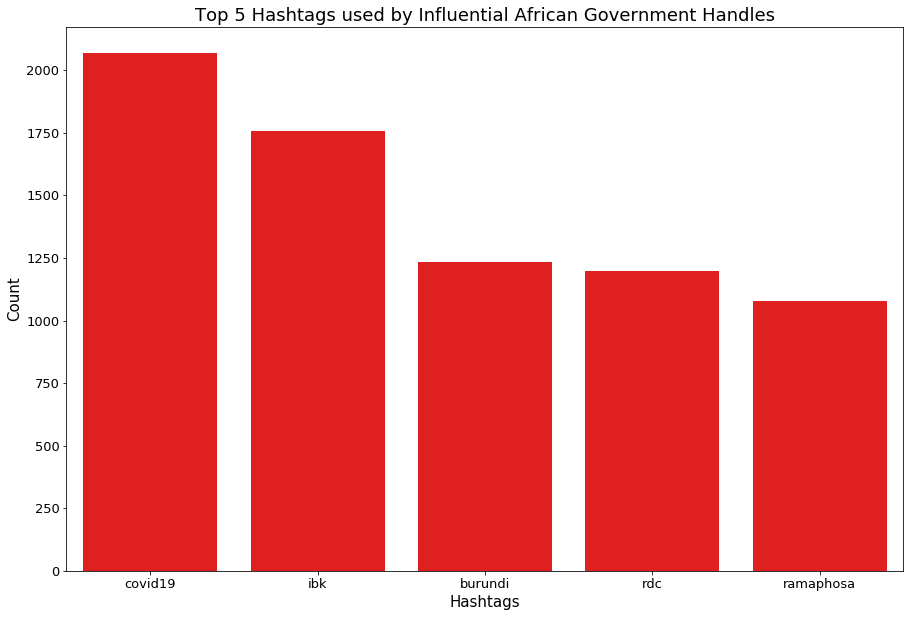

In [1620]:
plt.figure(figsize=(15,10))
sns.barplot(x='hashtags', y='hashtags_count', data=govtTop5Hash, color='r')
plt.title('Top 5 Hashtags used by Influential African Government Handles', fontsize=18)
plt.xlabel('Hashtags', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(format='png', fname='savedCharts/hashtags/top5HashGovt.png')
plt.show()

> Top 5 Hashtags used by africa Influencers on Twitter

In [1621]:
afriqInfTop5Hash = afriqInfHashGrouped.head()

In [1622]:
afriqInfTop5Hash

,hashtags,hashtags_count
0,covid19,5301
1,africa,4864
2,kenya,1705
3,somalia,1595
4,liveamp,1543


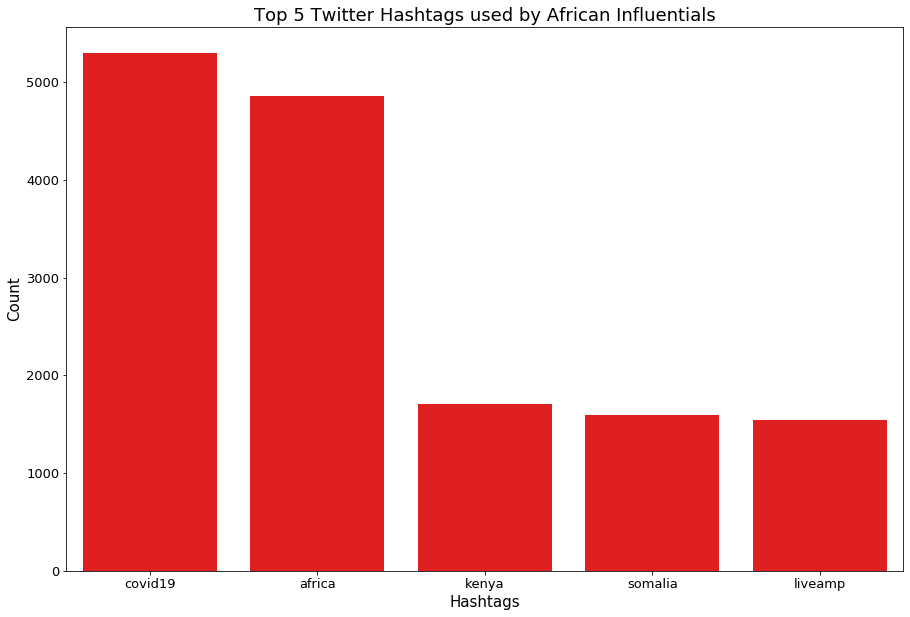

In [1623]:
plt.figure(figsize=(15,10))
sns.barplot(x='hashtags', y='hashtags_count', data=afriqInfTop5Hash, color='r')
plt.title('Top 5 Twitter Hashtags used by African Influentials', fontsize=18)
plt.xlabel('Hashtags', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(format='png', fname='savedCharts/hashtags/top5Inf.png')
plt.show()

> Comparison of #covid19 hashtag used between Africa Influencers and Government handles on Twitter

In [1624]:
govCov = govtTop5Hash.iloc[0]
infCov = afriqInfTop5Hash.iloc[0]

In [1625]:
govCov = govCov.to_dict()

In [1626]:
infCov = infCov.to_dict()

In [1627]:
compCov = pd.DataFrame([govCov, infCov])

In [1628]:
compCov

,hashtags,hashtags_count
0,covid19,2069
1,covid19,5301


In [1629]:
compCov

,hashtags,hashtags_count
0,covid19,2069
1,covid19,5301


In [1630]:
compCov = compCov.rename(index={0:'Africa_Govt', 1:'Africa_Influencers'}).drop('hashtags', axis=1).reset_index().rename(columns={'index':'group'})

In [1631]:
compCov

,group,hashtags_count
0,Africa_Govt,2069
1,Africa_Influencers,5301


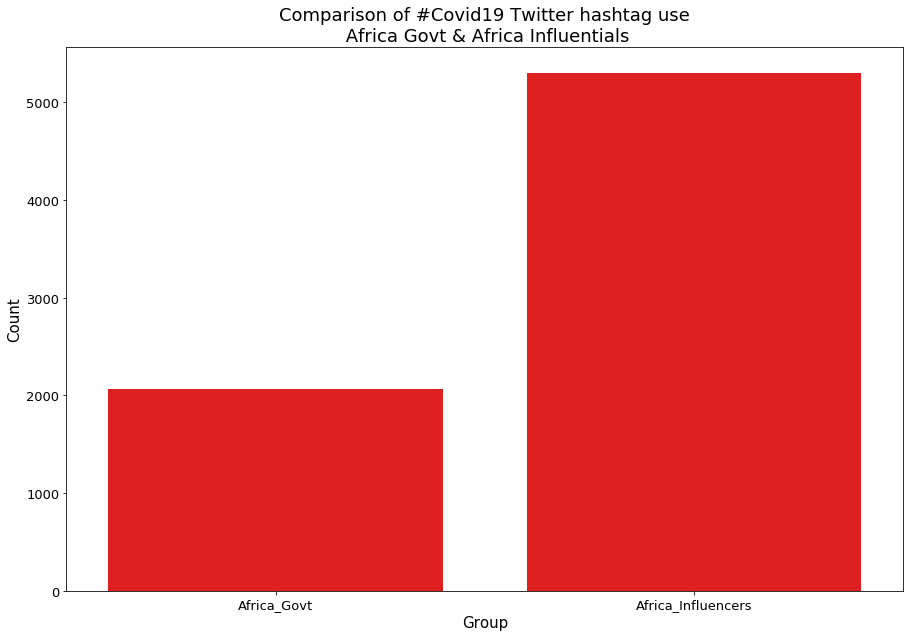

In [1632]:
plt.figure(figsize=(15,10))
sns.barplot(x='group', y='hashtags_count', data=compCov, color='r')
plt.title('Comparison of #Covid19 Twitter hashtag use\n Africa Govt & Africa Influentials', fontsize=18)
plt.xlabel('Group', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig(format='png', fname='savedCharts/hashtags/compCov.png')
plt.show()

<a id="r3"></a>


#### Research Question 3: 
 > Spatial & Temporal setting of influencers:
    
   > a. What profession/domain is most influential among the non-government influencers
    
   > b. What is the average age of the top influencers account? 
    
   > c. Is there a corellation between account age and popularity score, reach score amd relevance score

> a.

>> The domain profession of the top 3 most influential brand/personality in Africa include:

1. Trevor Noah - [Entertainment](https://www.trevornoah.com/)
2. Loyiso Gola - [Entertainment](http://www.loyisogola.com/)
3. Julius Sello Malema - [Politician](https://en.wikipedia.org/wiki/Julius_Malema)

b.

In [1633]:
afriqInfCopy[afriqInfCopy.name.str.contains('Julius Sello Malema|Loyiso Gola|Trevor Noah')]

,id,name,screen_name,description,statuses_count,friends_count,followers_count,account_age_days,avg_daily_tweets,hashtags,user_mentions,favorite_count,retweet_count,popularity,reach,relevance
84,33892790,Loyiso Gola,loyisogola,2 time Emmy nominated stand up comedian from S...,5660,3949,1085159,4105,1,21,150,6220,560131,566351,1081210,560281
88,117102398,Julius Sello Malema,Julius_S_Malema,Commander in Chief of Economic Freedom Fighter...,37192,652,3126246,3795,9,64,524,177856,286707,464563,3125594,287231
92,46335511,Trevor Noah,Trevornoah,Comedian from South Africa. I was in the crowd...,11185,325,10803194,4054,2,0,13,136346,592755,729101,10802869,592768


In [1634]:
topInfAcctAge = afriqInfCopy[afriqInfCopy.name.str.contains('Julius Sello Malema|Loyiso Gola|Trevor Noah')]['account_age_days']

In [1635]:
topInfAcctAge = topInfAcctAge.mean()
topInfAcctAge

3984.6666666666665

In [1636]:
avg_years = (topInfAcctAge/365).round(0)
print(f'\nThe average Years of been active on twitter by each of our top influencers is {avg_years} years\n')


The average Years of been active on twitter by each of our top influencers is 11.0 years



>> Let's confirm this

1. Trevor Noah - [Joined June 2009](https://twitter.com/trevornoah?lang=en)
2. Loyiso Gola - [Joined April 2009](https://twitter.com/loyisogola)
3. Julius Sello Malema - [Joined February 2010](https://twitter.com/Julius_S_Malema)

>> From the above we might infer that the rise to becoming influential Africans 
>> has been as a result of conisttency in audience engagement over a long period of time 

> This leads us to the third question...

>> Is there a corellation between account age and popularity score, reach score amd relevance score

c.

In [1637]:
ageCorr = afriqInfCopy[['account_age_days', 'popularity', 'reach', 'relevance']]

In [1638]:
ageCorr

,account_age_days,popularity,reach,relevance
0,3340,111420,25663,111190
1,4132,286,28226,242
2,3967,417561,98407,398721
3,2936,2751,63471,1603
4,3182,47747,16912,47690
...,...,...,...,...
88,3795,464563,3125594,287231
89,4453,294733,3574793,90837
90,501,38,4,39
91,4239,5578,1974120,2414


##### The table below shows the correlation coefficitn between age and various measure of influence

In [1639]:
ageCorr2 = pd.DataFrame(ageCorr.corr(method='pearson').iloc[0,[1,2,3]])
ageCorr2

,account_age_days
popularity,0.060454
reach,0.134171
relevance,0.060988


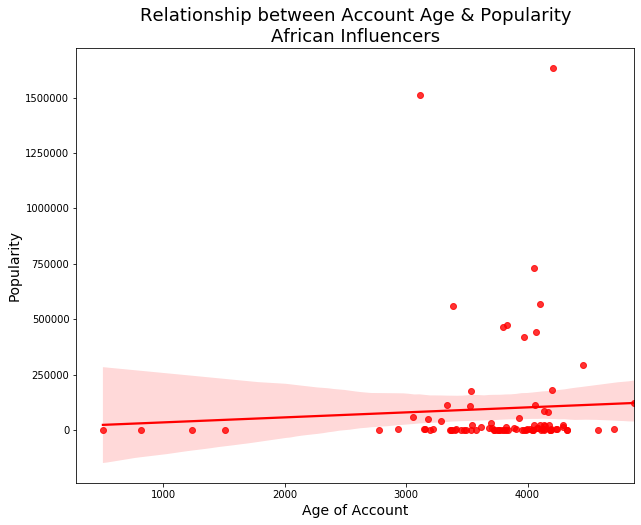

In [1640]:
plt.figure(figsize=(10,8))
sns.regplot(data=ageCorr, x='account_age_days', y= 'popularity', color='r')
plt.title('Relationship between Account Age & Popularity\nAfrican Influencers', fontsize=18)
plt.xlabel('Age of Account', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.savefig(fname='savedCharts/correlations/agePopCorr.png', format='png')
plt.show()

> Account Age Vs Reach (Followers)

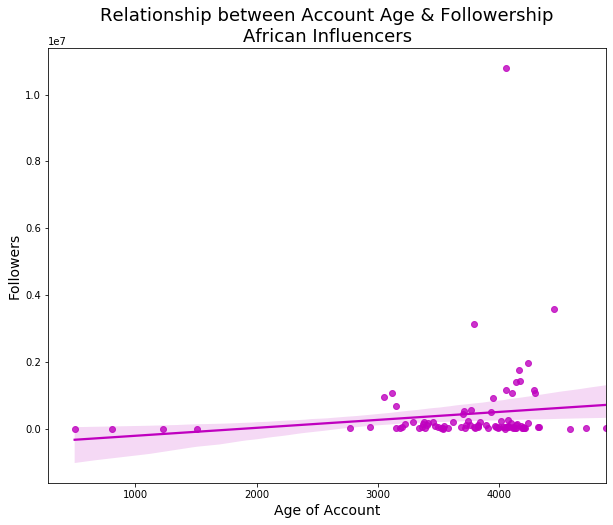

In [1641]:
plt.figure(figsize=(10,8))
sns.regplot(data=ageCorr, x='account_age_days', y= 'reach', color='m')
plt.title('Relationship between Account Age & Followership\nAfrican Influencers', fontsize=18)
plt.xlabel('Age of Account', fontsize=14)
plt.ylabel('Followers', fontsize=14)
plt.savefig(fname='savedCharts/correlations/ageReachCorr.png', format='png')
plt.show()

> Account Age Vs Relevance (mentions/retweets)

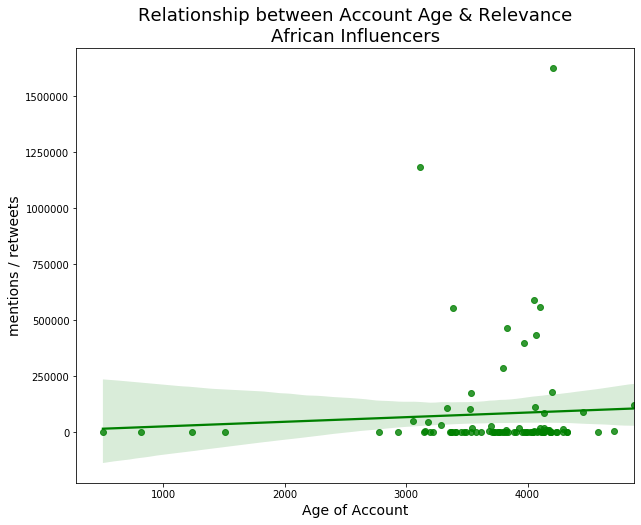

In [1642]:
plt.figure(figsize=(10,8))
sns.regplot(data=ageCorr, x='account_age_days', y= 'relevance', color='g')
plt.title('Relationship between Account Age & Relevance\nAfrican Influencers', fontsize=18)
plt.xlabel('Age of Account', fontsize=14)
plt.ylabel('mentions / retweets', fontsize=14)
plt.savefig(fname='savedCharts/correlations/ageRelevanceCorr.png', format='png')
plt.show()

### Interpretaion

>> From the above we can see that there is a weak positive correlation between account age and the various measure of influence

>> However, it differs a  bit in the case of reach (audience size). 

>> This is quite reasonable because longer twitter account age should have more opportunity to generate more followership but not in all cases

<a id="gi"><gi/>

### General Insights

1. Most of the influencers in Africa function in the entertainment industry especially

2. There is no direct much relationship between how long an influencer has been on twitter and thier gathered influence over the years

3. THere is a strong correlation between an influencer's popularity, and relvance, i.e mention/retweets can lead to  greater influence

4. Africa Influencers have a higher use than Africa Government generally in the use of the most popular hashtag among them `covid19`

<a id="rc"><rc/>

### Recommendations & Conclusions

> The following is recommned to Nike Inc in its proposed social media marketing campaign and expansion in Africa

> Nike Inc should consider partnership with the following influencers (who have no plotical affiliation):
    
    1. Loyiso Gola
    
    2. Trevor Noah

> Nike Inc Should consider framing thier marketing campaign & CSR programmes  around covid19 - the most popular hashtag

<a id="lim"><lim/>

### Limitations


>1. I could not gather the reply counts to effectively measure relevance score. 

          This is becuase it is a premium feature of the Twitter APi
          
> 2. I could not gather all tha needed hashtags for Research Question 2.

        This is both due to poor internet constraints and time constriants

<a id="ref"><ref/>
### References 


- Spearman Rank Correlation Coefficient

https://towardsdatascience.com/discover-the-strength-of-monotonic-relation-850d11f72046

https://machinelearningmastery.com/how-to-calculate-nonparametric-rank-correlation-in-python/ 

<a href="#top">Back to top</a>